# Przetwarzanie jƒôzyka naturalnego


## Wstƒôp

Obecnie najpopularniejsze model s≈Çu≈ºƒÖce do przetwarzania jƒôzyka naturalnego wykorzystujƒÖ architekturƒô transformacyjnƒÖ. Istnieje kilka bibliotek, implementujƒÖcych tƒô architekturƒô, ale w kontek≈õcie NLP najczƒô≈õciej wykorzystuje siƒô [Huggingface transformers](https://huggingface.co/docs/transformers/index).

Biblioteka ta poza samym [kodem ≈∫r√≥d≈Çowym](https://github.com/huggingface/transformers), zawiera szereg innych element√≥w. Do najwa≈ºniejszych z nich nale≈ºƒÖ:
* [modele](https://huggingface.co/models) - olbrzymia i ciƒÖgle rosnƒÖca liczba gotowych modeli, kt√≥rych mo≈ºemy u≈ºyƒá do rozwiƒÖzywania wielu problem√≥w z dziedziny NLP (ale r√≥wnie≈º w zakresie rozpoznawania mowy, czy przetwarzania obrazu),
* [zbiory danych](https://huggingface.co/datasets) - bardzo du≈ºy katalog przydatnych zbior√≥w danych, kt√≥re mo≈ºemy w prosty spos√≥b wykorzystaƒá do trenowania w≈Çasnych modeli NLP (oraz innych modeli).

## Weryfikacja dostƒôpno≈õci GPU

Trening modeli NLP wymaga dostƒôpu do akcelerator√≥w sprzƒôtowych, przyspieszajƒÖcych uczenie sieci neuronowych. Je≈õli nasz komputer nie jest wyposa≈ºony w GPU, to mo≈ºemy skorzystaƒá ze ≈õrodowiska Google Colab.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/apohllo/sztuczna-inteligencja/blob/master/lab5/lab_5.ipynb)

W tym ≈õrodowisku mo≈ºemy wybraƒá akcelerator spo≈õr√≥d GPU i TPU.

Sprawd≈∫my, czy mamy dostƒôp do ≈õrodowiska wyposa≈ºonego w akcelerator NVidii:

In [1]:
!nvidia-smi

Tue Dec 17 12:57:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Je≈õli akcelerator jest niedostƒôpny (polecenie sko≈Ñczy≈Ço siƒô b≈Çƒôdem), to zmieniamy ≈õrodowisko wykonawcze wybierajƒÖc z menu "≈örodowisko wykonawcze" -> "Zmie≈Ñ typ ≈õrodowiska wykonawczego" -> GPU.

## Podpiƒôcie dysku Google (opcjonalne)

Kolejnym elementem przygotowa≈Ñ, kt√≥ry jest opcjonalny, jest do≈ÇƒÖczenie w≈Çasnego dysku Google Drive do ≈õrodowiska Colab. Dziƒôki temu mo≈ºliwe jest zapisywanie wytrenowanych modeli, w trakcie procesu treningu, na "zewnƒôtrznym" dysku. Je≈õli Google Colab doprowadzi do przerwania procesu treningu, to mimo wszystko pliki, kt√≥re uda≈Ço siƒô zapisaƒá w trakcie treningu nie przepadnƒÖ. Mo≈ºliwe bƒôdzie wznowienie treningu ju≈º na czƒô≈õciowo wytrenowanym modelu.

W tym celu montujemy dysk Google w Colabie. Wymaga to autoryzacji narzƒôdzia Colab w Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Po podmontowaniu dysku mamy dostƒôp do ca≈Çej zawarto≈õci Google Drive. WskazujƒÖc miejsce zapisywania danych w trakcie treningu nale≈ºy wskazaƒá ≈õcie≈ºkƒô zaczynajƒÖcƒÖ siƒô od `/content/gdrive`, ale nale≈ºy wskazaƒá jaki≈õ podkatalog w ramach naszej przestrzeni dyskowej. Pe≈Çna ≈õcie≈ºka mo≈ºe mieƒá postaƒá `/content/gdrive/MyDrive/output`. Przed uruchomieniem treningu warto sprawdziƒá, czy dane zapisujƒÖ siƒô na dysku.

## Instalacja bibliotek Pythona

Podobnie jak w poprzednich laboratoriach optymalnym sposobem instalacji bibliotek jest wykorzystanie narzƒôdzia Poetry, kt√≥re ma ustalone wersji bibliotek w pliku `poetry.lock`. Biblioteki te zosta≈Çy zmodyfikowane wzglƒôdem wcze≈õniejszych laboratori√≥w, dlatego ponownie powinni≈õmy jest zainstalowaƒá.

In [4]:
# !poetry install --no-root
# !pip install transformers
# !pip install sacremoses
# !pip install datasets
# !pip install evaluate
# !pip install sentencepiece

MajƒÖc zainstalowane niezbedne bilioteki, mo≈ºemy skorzystaƒá z wszystkich modeli i zbior√≥w danych zarejestrowanych w katalogu.

Typowym sposobem u≈ºycia dostƒôpnych modeli jest:
* *wykorzystanie gotowego modelu*, kt√≥ry realizuje okre≈õlone zadanie, np. [analizƒô senetymentu w jƒôzyku angielskim](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis) - model tego rodzaju nie musi byƒá trenowywany, wystarczy go uruchomiƒá aby uzyskaƒá wynik klasyfikacji (mo≈ºna to zobaczyƒá w demo pod wskazanym linkiem),
* *wykorzystanie modelu bazowego*, kt√≥ry jest dotrenowywany do okre≈õlonego zadania; przyk≈Çadem takiego modelu jest [HerBERT base](https://huggingface.co/allegro/herbert-base-cased), kt√≥ry uczony by≈Ç jako maskowany model jƒôzyka. ≈ªeby wykorzystaƒá go do konkretnego zadania, musimy wybraƒá dla niego "g≈Çowƒô klasyfikacyjnƒÖ" oraz dotrenowaƒá na w≈Çasnym zbiorze danych.

Modele tego rodzaju r√≥≈ºniƒÖ siƒô od siebie, mo≈ºna je za≈Çadowaƒá za pomocƒÖ wsp√≥lnego interfejsu, ale najlepiej jest wykorzystaƒá jednƒÖ¬†ze specjalizowanych klas, dostosowanych do zadania, kt√≥re chcemy zrealizowaƒá. Zaczniemy od za≈Çadowania modelu BERT base - jednego z najbardziej popularnych modeli, dla jƒôzyka angielskiego. Za jego pomocƒÖ bƒôdziemy odgadywaƒá brakujƒÖce wyrazy w tek≈õcie. Wykorzystamy do tego wywo≈Çanie `AutoModelForMaskedLM`.

In [5]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

model = AutoModelForMaskedLM.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From üëâv4.50üëà onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight'

Za≈Çadowany model jest modu≈Çem PyTorcha. Mo≈ºemy zatem korzystaƒá z API tej biblioteki. Mo≈ºemy np. sprawdziƒá ile parametr√≥w ma model BERT base:

In [6]:
count = sum(p.numel() for p in model.parameters() if p.requires_grad)

'{:,}'.format(count).replace(',', ' ')

'108 340 804'

Widzimi zatem, ≈ºe nasz model jest bardzo du≈ºy - zawiera ponad 100 milion√≥w parametr√≥w, a jest to tzw. model bazowy. Modele obecnie wykorzystywane majƒÖ jeszcze wiƒôcej parametr√≥w - du≈ºe modele jƒôzykowe, takie jak ChatGPT posiadajƒÖ wiƒôcej ni≈º 100 miliard√≥w parametr√≥w.

Mo≈ºemy r√≥wnie≈º podejrzeƒá samƒÖ strukturƒô modelu.

In [7]:
model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

Je≈õli dysponujemy akceleratorem (GPU lub inny), to pamiƒôtajmy ≈ºeby przeni≈õƒá model na ten akcelerator, np.

In [8]:
# Je≈õli chcesz u≈ºyƒá akceleratora wpisz "cuda:0" lub nazwƒô odpowiedniego akceleratora.
# ≈ªeby kod poni≈ºej dzia≈Ç, ale obliczenia by≈Çy wykonywane na CPU, wpisz "cpu"
#device = "cpu"
device = "cuda:0"
model.to(device)
print("")

# Tokenizacja tekstu

Za≈Çadowanie samego modelu nie jest jednak wystarczajƒÖce, ≈ºeby zaczƒÖƒá go wykorzystywaƒá. Musimy mieƒá mechanizm zamiany tekstu (≈Ça≈Ñcucha znak√≥w), na ciƒÖg token√≥w, nale≈ºƒÖcych do okre≈õlonego s≈Çownika. W trakcie treningu modelu, s≈Çownik ten jest okre≈õlany (wybierany w spos√≥b algorytmiczny) przed w≈Ça≈õciwym treningiem sieci neuronowej. Choƒá mo≈ºliwe jest jego p√≥≈∫niejsze rozszerzenie (douczenie na danych treningowych, pozwala r√≥wnie≈º uzyskaƒá reprezentacjƒô brakujƒÖcych token√≥w), to zwykle wykorzystuje siƒô s≈Çownik w postaci, kt√≥ra zosta≈Ça okre≈õlona przed treningiem sieci neuronowej. Dlatego tak istotne jest wskazanie w≈Ça≈õciwego s≈Çownika dla tokenizera dokonujƒÖcego podzia≈Çu tekstu.

Biblioteka posiada klasƒô `AutoTokenizer`, kt√≥ra akceptuje nazwƒô modelu, co pozwala automatycznie za≈Çadowaƒá s≈Çownik korespondujƒÖcy z wybranym modelem sieci neuronowej. Trzeba jednak pamiƒôtaƒá, ≈ºe je≈õli u≈ºywamy 2 modeli, to ka≈ºdy z nich najpewniej bƒôdzie mia≈Ç inny s≈Çownik, a co za tym idzie muszƒÖ one mieƒá w≈Çasne instancje klasy `Tokenizer`.

In [9]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

Tokenizer pos≈Çuguje siƒô s≈Çownikiem o sta≈Çym rozmiarze. Podowuje to oczywi≈õcie, ≈ºe nie wszystkie wyrazy wystƒôpujƒÖce w tek≈õcie, bƒôdƒÖ siƒô¬†w nim znajdowa≈Çy. Co wiƒôcej, je≈õli u≈ºyjemy tokenizera do podzia≈Çu tekstu w innym jƒôzyku, ni≈º ten dla kt√≥rego zosta≈Ç on stworzony, to taki tekst bƒôdzie dzielony na wiƒôkszƒÖ liczbƒô token√≥w.

In [10]:
sentence1 = tokenizer.encode(
    "The quick brown fox jumps over the lazy dog.", return_tensors="pt"
)
print(sentence1)
print(sentence1.shape)

sentence2 = tokenizer.encode("Za≈º√≥≈Çƒá gƒô≈õlƒÖ ja≈∫≈Ñ.", return_tensors="pt")
print(sentence2)
print(sentence2.shape)

tensor([[  101,  1109,  3613,  3058, 17594, 15457,  1166,  1103, 16688,  3676,
           119,   102]])
torch.Size([1, 12])
tensor([[  101,   163,  1161, 28259,  7774, 20671,  7128,   176, 28221, 28244,
          1233, 28213,   179,  1161, 28257, 19339,   119,   102]])
torch.Size([1, 18])


KorzystajƒÖƒá z tokenizera dla jƒôzyka angielsiego do podzia≈Çu polskiego zdania, widzimy, ≈ºe otrzymujemy znacznie wiƒôkszƒÖ liczbƒô token√≥w. ≈ªeby zobaczyƒá, w jaki spos√≥b tokenizer dokona≈Ç podzia≈Çu tekstu, mo≈ºemy wykorzystaƒá wywo≈Çanie `covert_ids_to_tokens`:

In [11]:
print("|".join(tokenizer.convert_ids_to_tokens(list(sentence1[0]))))
print("|".join(tokenizer.convert_ids_to_tokens(list(sentence2[0]))))

[CLS]|The|quick|brown|fox|jumps|over|the|lazy|dog|.|[SEP]
[CLS]|Z|##a|##≈º|##√≥|##≈Ç|##ƒá|g|##ƒô|##≈õ|##l|##ƒÖ|j|##a|##≈∫|##≈Ñ|.|[SEP]


Widzimy, ≈ºe dla jƒôzka angielskiego wszystkie wyrazy w zdaniu zosta≈Çy przekszta≈Çcone w pojedyncze tokeny. W przypadku zdania w jƒôzyku polskim, zawierajƒÖcego szereg znak√≥w diakrytycznych sytuacja jest zupe≈Çnie inna - ka≈ºdy znak zosta≈Ç wyodrƒôbniony do osobnego sub-tokenu. To, ≈ºe mamy do czynienia z sub-tokenami sygnalizowane jest przez dwa krzy≈ºyki poprzedzajƒÖce dany sub-token. OznaczajƒÖ one, ≈ºe ten sub-token musi byƒá sklejony z porzedzajƒÖcym go tokenem, aby uzyskaƒá w≈Ça≈õciwy ≈Ça≈Ñcuch znak√≥w.

## Zadanie 1 (0.5 punkt)

Wykorzystaj tokenizer dla modelu `allegro/herbert-base-cased`, aby dokonaƒá tokenizacji tych samych zda≈Ñ. Jakie wnioski mo≈ºna wyciƒÖgnƒÖƒá przyglƒÖdajƒÖc siƒô sposobowi tokenizacji za pomocƒÖ r√≥≈ºnych s≈Çownik√≥w?

In [12]:
tokenizer2 = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
tokenizer2

sentence3 = tokenizer2.encode(
    "The quick brown fox jumps over the lazy dog.", return_tensors="pt"
)
print(sentence3)
print(sentence3.shape)

sentence4 = tokenizer2.encode("Za≈º√≥≈Çƒá gƒô≈õlƒÖ ja≈∫≈Ñ.", return_tensors="pt")
print(sentence4)
print(sentence4.shape)


tokenizer_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/907k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/556k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

tensor([[    0,  7117, 22991,  4879, 25015,  1016,  3435,  1055,  2202,  4952,
          1010,    83, 10259,  6854,  2050,  3852,  2065,  1031,  1899,     2]])
torch.Size([1, 20])
tensor([[    0,  2237,  7227,  1048,  7029, 46389,  2059,   272,  1059,  1899,
             2]])
torch.Size([1, 11])


In [13]:
print("|".join(tokenizer2.convert_ids_to_tokens(list(sentence3[0]))))
print("|".join(tokenizer2.convert_ids_to_tokens(list(sentence4[0]))))

<s>|The</w>|qui|ck</w>|brow|n</w>|fo|x</w>|ju|mp|s</w>|o|ver</w>|the</w>|la|zy</w>|do|g</w>|.</w>|</s>
<s>|Za|≈º√≥≈Ç|ƒá</w>|gƒô|≈õlƒÖ</w>|ja|≈∫|≈Ñ</w>|.</w>|</s>


##### Komentarz
Model allegro gorzej radzi sobie z jƒôzykiem angielskim ni≈º poprzedni model, za to lepiej z jƒôzykiem polskim

W wynikach tokenizacji poza wyrazami/tokenami wystƒôpujƒÖcymi w oryginalnym tek≈õcie pojawiajƒÖ siƒô jeszcze dodatkowe znaczniki `[CLS]` oraz `[SEP]` (albo inne znaczniki - w zale≈ºno≈õci od u≈ºytego s≈Çownika). MajƒÖ one specjalne znaczenie i mogƒÖ byƒá wykorzystywane do realizacji specyficznych funkcji zwiƒÖzanych z analizƒÖ tekstu. Np. reprezentacja tokenu `[CLS]` wykorzystywana jest w zadaniach klasyfikacji zda≈Ñ. Z kolei token `[SEP]` wykorzystywany jest do odr√≥≈ºnienia zda≈Ñ, w zadaniach wymagajƒÖcych na wej≈õciu dw√≥ch zda≈Ñ (np. okre≈õlenia, na ile zdania te sƒÖ podobne do siebie).


# Modelowanie jƒôzyka

Modele pretrenowane w re≈ºimie self-supervised learning (SSL) nie posiadajƒÖ specjalnych zdolno≈õci w zakresie rozwiƒÖzywania konkretnych zada≈Ñ z zakresu przetwarzania jƒôzyka naturalnego, takich jak odpowiadanie na pytania, czy klasyfikacja tekstu (z wyjƒÖtkiem bardzo du≈ºych modeli, takich jak np. GPT-3, kt√≥rych model jƒôzykowy zdolny jest do predykcji np. sensownych odpowiedzi na pytania). Mo≈ºna je jednak wykorzystaƒá do okre≈õlania prawdopodobie≈Ñstwa wyraz√≥w w tek≈õcie, a tym samym do sprawdzenia, jakƒÖ wiedzƒô posiada okre≈õlony model w zakresie znajomo≈õci jƒôzyka, czy te≈º og√≥lnƒÖ wiedzƒô o ≈õwiecie.

Aby sprawdziƒá jak model radzi sobie w tych zadaniach, mo≈ºemy dokonaƒá inferencji na danych wej≈õciowych, w kt√≥rych niekt√≥re wyrazy zostanƒÖ zastƒÖpione specjalnymi symbolami maskujƒÖcymi, wykorzystywanymi w trakcie pre-treningu modelu.

Nale≈ºy mieƒá na uwadze, ≈ºe r√≥≈ºne modele mogƒÖ korzystaƒá z r√≥≈ºnych specjalnych sekwencji w trakcie pretreningu. Np. Bert korzysta z sekwencji `[MASK]`. WyglƒÖd tokenu maskujƒÖcego lub jego identyfikator mo≈ºemy sprawdziƒá w [pliku konfiguracji tokenizera](https://huggingface.co/bert-base-cased/raw/main/tokenizer.json) dystrubowanym razem z modelem, albo odczytaƒá wprost z instancji tokenizera.

W pierwszej kolejno≈õci, spr√≥bujemy uzupe≈Çniƒá brakujƒÖcy wyraz w angielskim zdaniu.

In [14]:
sentence_en_text = "The quick brown [MASK] jumps over the lazy dog."

sentence_en = tokenizer.encode(
    sentence_en_text, return_tensors="pt"
)
#
print("|".join(tokenizer.convert_ids_to_tokens(list(sentence_en[0]))))
target = model(sentence_en.to(device))
print(target.logits[0][4])

[CLS]|The|quick|brown|[MASK]|jumps|over|the|lazy|dog|.|[SEP]
tensor([-5.3489, -5.6063, -5.1303,  ..., -5.9625, -4.1559, -4.5403],
       device='cuda:0', grad_fn=<SelectBackward0>)


Poniewa≈º zdanie po stokenizowaniu uzupe≈Çniane jest znacznikiem `[CLS]`, to zamaskowane s≈Çowo znajduje siƒô¬†na 4 pozycji. Wywo≈Çanie `target.logits[0][4]` pokazuje tensor z rozk≈Çadem prawdopodobie≈Ñstwa poszczeg√≥lnych wyraz√≥w, kt√≥re zosta≈Ço okre≈õlone na podstawie parametr√≥w modelu. Mo≈ºemy wybraƒá wyrazy, kt√≥re posiadajƒÖ najwiƒôksze prawdopodobie≈Ñstwo, korzystajƒÖc z wywo≈Çania `torch.topk`:

In [15]:
import torch

top = torch.topk(target.logits[0][4], 5)
top

torch.return_types.topk(
values=tensor([12.1982, 11.2289, 10.6009, 10.1278, 10.0120], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([ 3676,  1663,  5855,  4965, 21566], device='cuda:0'))

Otrzymali≈õmy dwa wektory - `values` zawierajƒÖcy sk≈Çadowe wektora wyj≈õciowego sieci neuronowej (nieznormalizowane) oraz `indices` zawierajƒÖcy indeksy tych sk≈Çadowych. Na tej podstawie mo≈ºemy wy≈õwietliƒá wyraz, kt√≥re wed≈Çug modelu sƒÖ najbardziej prawdopodobnymi uzupe≈Çnieniami zamaskowanego wyrazu:

In [16]:
words = tokenizer.convert_ids_to_tokens(top.indices)

<BarContainer object of 5 artists>

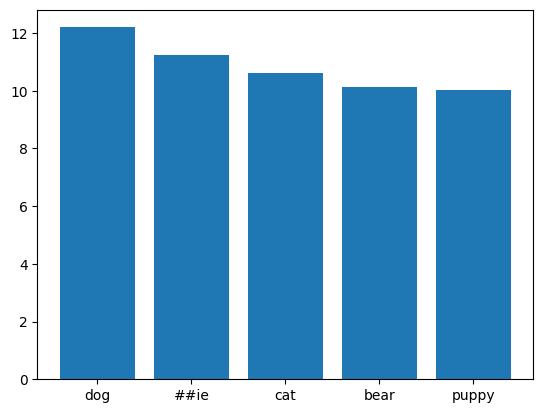

In [17]:
import matplotlib.pyplot as plt

plt.bar(words, top.values.cpu().detach().numpy())

Wed≈Çug modelu najbardziej prawdopodobnym uzupe≈Çnieniem brakujƒÖcego wyrazu jest `dog` (a nie `fox`). Nieco zaskakujƒÖcy mo≈ºe byƒá¬†drugi wyraz `##ie`, ale po dodaniu go do istniejƒÖcego tekstu otrzymamy zdanie: "The quick brownie jumps over the lazy dog", kt√≥re r√≥wnie≈º wydaje siƒô¬†sensowne (choƒá¬†nieco zaskakujƒÖce).

## Zadanie 2 (1.5 punkty)

WykorzystujƒÖc model `allegro/herbert-base-cased` zaproponuj zdania z jednym brakujƒÖcym wyrazem, weryfikujƒÖce zdolno≈õƒá tego modelu do:
* odmiany przez polskie przypadki,
* uwzglƒôdniania d≈Çugodystansowych zwiƒÖzk√≥w w tek≈õcie,
* reprezentowania wiedzy o ≈õwiecie.

Dla ka≈ºdego problemu wymy≈õl po 3 zdania sprawdzajƒÖce i wy≈õwietl predykcjƒô dla 5 najbardziej prawdopodobnych wyraz√≥w.

Mo≈ºesz wykorzystaƒá kod z funkcji `plot_words`, kt√≥ry u≈Çatwi Ci wy≈õwietlanie wynik√≥w. Zweryfikuj r√≥wnie≈º jaki token maskujƒÖcy wykorzystywany jest w tym modelu. Pamiƒôtaj r√≥wnie≈º o za≈Çadowaniu modelu `allegro/herbert-base-cased`.

Oce≈Ñ zdolno≈õci modelu w zakresie wskazanych zada≈Ñ.

In [18]:
def plot_words(sentence, word_model, word_tokenizer, mask="[MASK]"):
    sentence = word_tokenizer.encode(sentence, return_tensors="pt")
    tokens = word_tokenizer.convert_ids_to_tokens(list(sentence[0]))
    print("|".join(tokens))
    target = word_model(sentence.to(device))
    top = torch.topk(target.logits[0][tokens.index(mask)], 5)
    words = word_tokenizer.convert_ids_to_tokens(top.indices)
    mask_token = word_tokenizer.encode(mask, add_special_tokens=False)[0]
    token_ids = list(sentence[0].cpu().detach().numpy())
    mask_index = token_ids.index(mask_token)
    for word_id in top.indices:
        token_ids[mask_index]  = word_id
        print(word_tokenizer.decode(token_ids, skip_special_tokens=True))

    plt.xticks(rotation=45)
    plt.bar(words, top.values.cpu().detach().numpy())
    plt.show()




In [19]:
allegro_model = AutoModelForMaskedLM.from_pretrained("allegro/herbert-base-cased")
allegro_tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
allegro_model.to(device)

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [20]:
#Zadanie 1: Odmiana przez przypadki

<s>|W</w>|tym</w>|momencie</w>|my|≈õle</w>|o</w>|<mask>|.</w>|</s>
W tym momencie my≈õle o przysz≈Ço≈õci .
W tym momencie my≈õle o tym .
W tym momencie my≈õle o tobie .
W tym momencie my≈õle o sobie .
W tym momencie my≈õle o dzieciach .


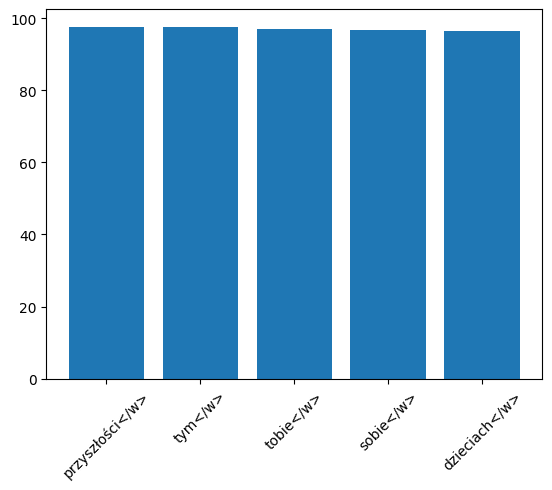

In [21]:
plot_words(
    sentence="W tym momencie my≈õle o <mask>.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

<s>|U|cze</w>|siƒô</w>|przez</w>|rok</w>|jƒôzyka</w>|<mask>|.</w>|</s>
Ucze siƒô przez rok jƒôzyka angielskiego .
Ucze siƒô przez rok jƒôzyka polskiego .
Ucze siƒô przez rok jƒôzyka francuskiego .
Ucze siƒô przez rok jƒôzyka niemieckiego .
Ucze siƒô przez rok jƒôzyka hiszpa≈Ñskiego .


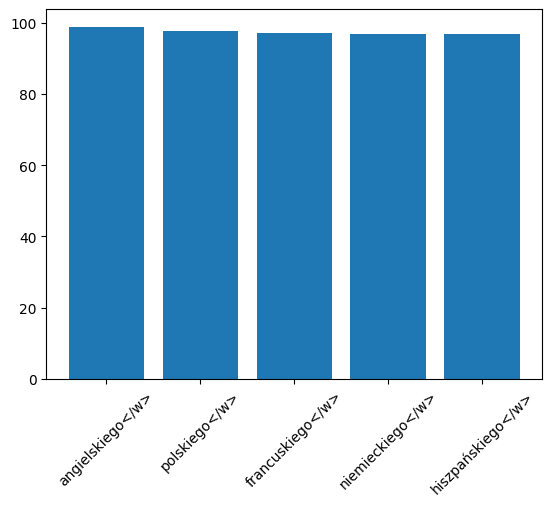

In [22]:
plot_words(
    sentence="Ucze siƒô przez rok jƒôzyka <mask>.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

<s>|Bardzo</w>|jestem</w>|<mask>|w</w>|tym</w>|momencie</w>|.</w>|</s>
Bardzo jestem szczƒô≈õliwa w tym momencie .
Bardzo jestem szczƒô≈õliwy w tym momencie .
Bardzo jestem optymistƒÖ w tym momencie .
Bardzo jestem zainteresowany w tym momencie .
Bardzo jestem zadowolony w tym momencie .


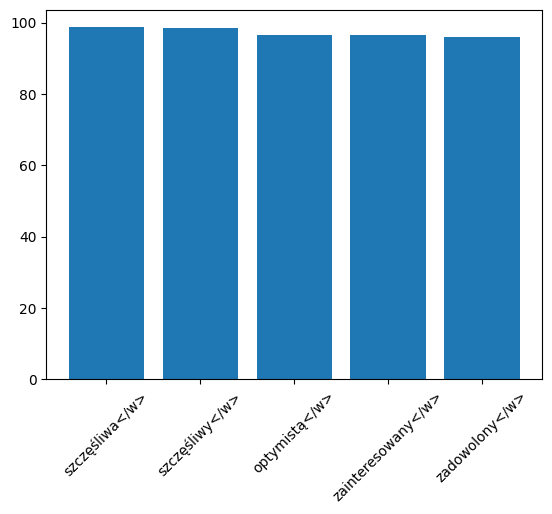

In [23]:
plot_words(
    sentence="Bardzo jestem <mask> w tym momencie.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

In [24]:
#Zadanie 2: D≈Çugodystansowe zwiƒÖzki w tek≈õcie

<s>|Pomimo</w>|≈ºe</w>|by≈Ço</w>|bardzo</w>|p√≥≈∫no</w>|,</w>|kto≈õ</w>|postanowi≈Ç</w>|,</w>|≈ºe</w>|jeszcze</w>|<mask>|pracƒô</w>|.</w>|</s>
Pomimo ≈ºe by≈Ço bardzo p√≥≈∫no , kto≈õ postanowi≈Ç , ≈ºe jeszcze znajdzie pracƒô .
Pomimo ≈ºe by≈Ço bardzo p√≥≈∫no , kto≈õ postanowi≈Ç , ≈ºe jeszcze dostanie pracƒô .
Pomimo ≈ºe by≈Ço bardzo p√≥≈∫no , kto≈õ postanowi≈Ç , ≈ºe jeszcze podejmie pracƒô .
Pomimo ≈ºe by≈Ço bardzo p√≥≈∫no , kto≈õ postanowi≈Ç , ≈ºe jeszcze straci pracƒô .
Pomimo ≈ºe by≈Ço bardzo p√≥≈∫no , kto≈õ postanowi≈Ç , ≈ºe jeszcze ma pracƒô .


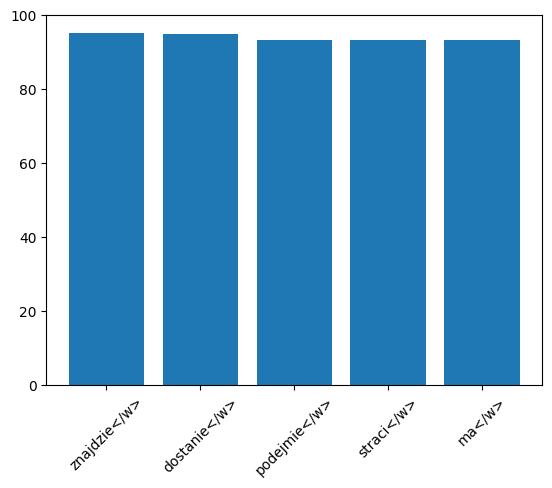

In [25]:
plot_words(
    sentence="Pomimo ≈ºe by≈Ço bardzo p√≥≈∫no, kto≈õ postanowi≈Ç, ≈ºe jeszcze <mask> pracƒô.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

<s>|Robert</w>|nie</w>|jad|≈Ç</w>|dzisiaj</w>|≈õniad|ania</w>|rano</w>|.</w>|Jest</w>|po≈Çudnie</w>|,</w>|wiƒôc</w>|uzna≈Ç</w>|,</w>|≈ºe</w>|musi</w>|<mask>|co≈õ</w>|</s>
Robert nie jad≈Ç dzisiaj ≈õniadania rano . Jest po≈Çudnie , wiƒôc uzna≈Ç , ≈ºe musi zje≈õƒá co≈õ
Robert nie jad≈Ç dzisiaj ≈õniadania rano . Jest po≈Çudnie , wiƒôc uzna≈Ç , ≈ºe musi zrobiƒá co≈õ
Robert nie jad≈Ç dzisiaj ≈õniadania rano . Jest po≈Çudnie , wiƒôc uzna≈Ç , ≈ºe musi je≈õƒá co≈õ
Robert nie jad≈Ç dzisiaj ≈õniadania rano . Jest po≈Çudnie , wiƒôc uzna≈Ç , ≈ºe musi jeszcze co≈õ
Robert nie jad≈Ç dzisiaj ≈õniadania rano . Jest po≈Çudnie , wiƒôc uzna≈Ç , ≈ºe musi przygotowaƒá co≈õ


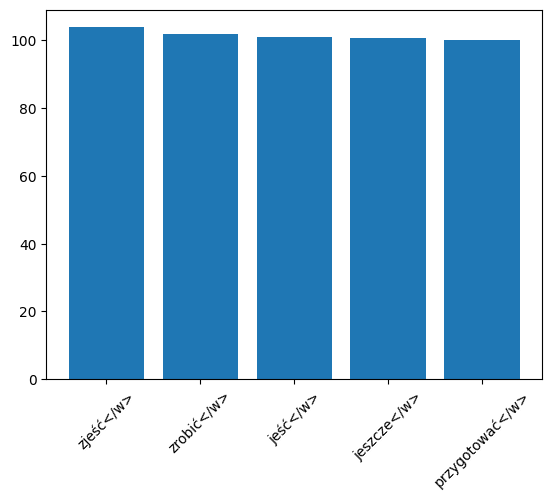

In [26]:
plot_words(
    sentence="Robert nie jad≈Ç dzisiaj ≈õniadania rano. Jest po≈Çudnie, wiƒôc uzna≈Ç, ≈ºe musi <mask> co≈õ",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

<s>|Wczoraj</w>|wieczorem</w>|wr√≥ci≈Çem</w>|do</w>|domu</w>|i</w>|po|≈Ço≈ºy≈Çem</w>|klucze</w>|w</w>|innym</w>|miejscu</w>|ni≈º</w>|zwykle</w>|.</w>|Z</w>|tego</w>|powodu</w>|mia≈Çem</w>|trudno≈õci</w>|w</w>|znalezieniu</w>|<mask>|kolejnego</w>|dnia</w>|.</w>|</s>
Wczoraj wieczorem wr√≥ci≈Çem do domu i po≈Ço≈ºy≈Çem klucze w innym miejscu ni≈º zwykle . Z tego powodu mia≈Çem trudno≈õci w znalezieniu pracy kolejnego dnia .
Wczoraj wieczorem wr√≥ci≈Çem do domu i po≈Ço≈ºy≈Çem klucze w innym miejscu ni≈º zwykle . Z tego powodu mia≈Çem trudno≈õci w znalezieniu mieszkania kolejnego dnia .
Wczoraj wieczorem wr√≥ci≈Çem do domu i po≈Ço≈ºy≈Çem klucze w innym miejscu ni≈º zwykle . Z tego powodu mia≈Çem trudno≈õci w znalezieniu ich kolejnego dnia .
Wczoraj wieczorem wr√≥ci≈Çem do domu i po≈Ço≈ºy≈Çem klucze w innym miejscu ni≈º zwykle . Z tego powodu mia≈Çem trudno≈õci w znalezieniu kluczy kolejnego dnia .
Wczoraj wieczorem wr√≥ci≈Çem do domu i po≈Ço≈ºy≈Çem klucze w innym miejscu ni≈º zwykle . Z teg

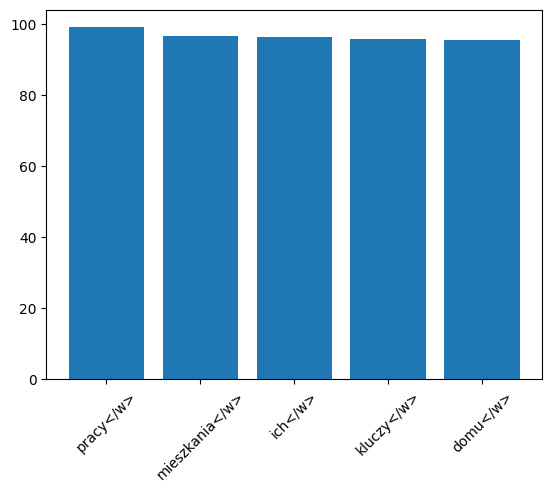

In [27]:
plot_words(
    sentence="Wczoraj wieczorem wr√≥ci≈Çem do domu i po≈Ço≈ºy≈Çem klucze w innym miejscu ni≈º zwykle. Z tego powodu mia≈Çem trudno≈õci w znalezieniu <mask> kolejnego dnia.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

In [28]:
#Zadanie 3: Wiedza o ≈õwiecie

<s>|Prezyden|tem</w>|Stan√≥w</w>|Zjednoczonych</w>|jest</w>|<mask>|.</w>|</s>
Prezydentem Stan√≥w Zjednoczonych jest . .
Prezydentem Stan√≥w Zjednoczonych jest Niemiec .
Prezydentem Stan√≥w Zjednoczonych jest USA .
Prezydentem Stan√≥w Zjednoczonych jest Clinton .
Prezydentem Stan√≥w Zjednoczonych jest Polak .


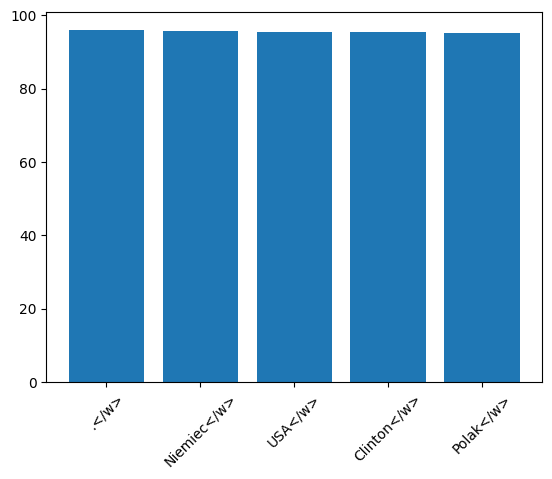

In [29]:
plot_words(
    sentence="Prezydentem Stan√≥w Zjednoczonych jest <mask>.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

<s>|<</w>|Najwiƒôksze</w>|miasto</w>|Azji</w>|to</w>|<mask>|.</w>|</s>
< Najwiƒôksze miasto Azji to Tokio .
< Najwiƒôksze miasto Azji to . .
< Najwiƒôksze miasto Azji to Meksyk .
< Najwiƒôksze miasto Azji to Indie .
< Najwiƒôksze miasto Azji to Londyn .


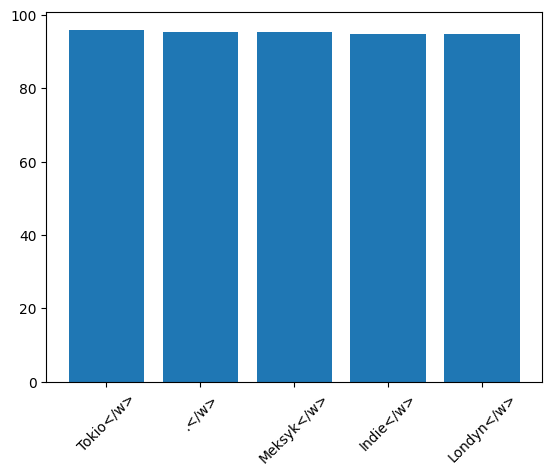

In [30]:
plot_words(
    sentence="<Najwiƒôksze miasto Azji to <mask>.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

<s>|<mask>|jest</w>|najmniej|szƒÖ</w>|plane|tƒÖ</w>|w</w>|U|k≈Çadzie</w>|S≈Çone|cznym</w>|.</w>|</s>
Ziemia jest najmniejszƒÖ planetƒÖ w Uk≈Çadzie S≈Çonecznym .
Obecnie jest najmniejszƒÖ planetƒÖ w Uk≈Çadzie S≈Çonecznym .
S≈Ço≈Ñce jest najmniejszƒÖ planetƒÖ w Uk≈Çadzie S≈Çonecznym .
Mars jest najmniejszƒÖ planetƒÖ w Uk≈Çadzie S≈Çonecznym .
Wenus jest najmniejszƒÖ planetƒÖ w Uk≈Çadzie S≈Çonecznym .


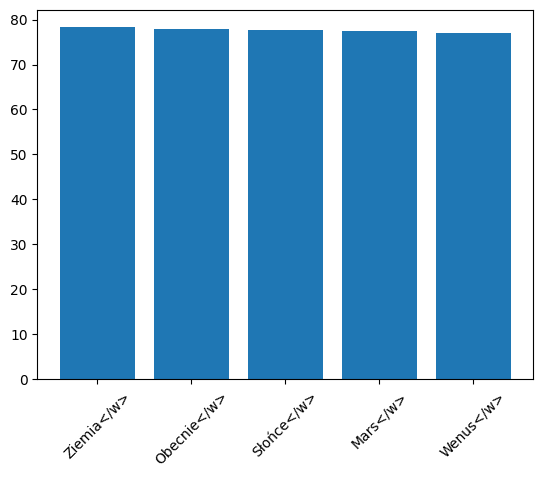

In [31]:
plot_words(
    sentence="<mask> jest najmniejszƒÖ planetƒÖ w Uk≈Çadzie S≈Çonecznym.",
    word_model = allegro_model,
    word_tokenizer = allegro_tokenizer,
    mask = "<mask>"
)

##### Komentarz
* Model ca≈Çkiem dobrze sobie radzi w podpunktach ka≈ºdym podpunkcie.
* Czƒôsto podaje spodziewane odpowiedzi i uzasadnione.
* Potrafi jednak mieƒá czsami problemy, ≈ºeby dopasowaƒá z logicznƒÖ odpowied≈∫ z konteksu.
* Odpowiedzi w podpunkcie 3 potrafiƒÖ byƒá zastanawiajƒÖce, tak jak to widzimy, w ostatnim zdaniu gdzie poda≈Ç S≈Ço≈Ñce jako planeta.




# Klasyfikacja tekstu

Pierwszym zadaniem, kt√≥re zrealizujemy korzystajƒÖc z modelu HerBERT bƒôdzie klasyfikacja tekstu. Bƒôdzie to jednak do≈õƒá nietypowe zadanie. O ile oczekiwanym wynikiem jest klasyfikacja binarna, czyli do≈õƒá popularny typ klasyfikacji, o tyle dane wej≈õciowe sƒÖ nietypowe, gdy≈º sƒÖ to pary: `(pytanie, kontekst)`. Celem algorytmu jest okre≈õlenie, czy na zadane pytanie mo≈ºna odpowiedzieƒá na podstawie informacji znajdujƒÖcych siƒô w kontek≈õcie.

Model tego rodzaju jest nietypowy, poniewa≈º jest to zadanie z zakresu klasyfikacji par tekst√≥w, ale my potraktujemy je jak zadanie klasyfikacji jednego tekstu, oznaczajƒÖc jedynie fragmenty tekstu jako `Pytanie:` oraz `Kontekst:`. Wykorzystamy tutaj zdolno≈õƒá modeli transformacyjnych do automatycznego nauczenia siƒô tego rodzaju znacznik√≥w, przez co proces przygotowania danych bƒôdzie bardzo uproszczony.

Zbiorem danych, kt√≥ry wykorzystamy do treningu i ewaluacji modelu bƒôdzie PoQUAD - zbi√≥r inspirowany angielskim [SQuADem](https://rajpurkar.github.io/SQuAD-explorer/), czyli zbiorem zawierajƒÖcym ponad 100 tys. pyta≈Ñ i odpowiadajƒÖcych im odpowiedzi. Zbi√≥r ten powsta≈Ç niedawno i jest jeszcze rozbudowywany. Zawiera on pytania, odpowiedzi oraz konteksty, na podstawie kt√≥rych mo≈ºna udzieliƒá odpowiedzi.

W dalszej czƒô≈õci laboratorium skoncentrujemy siƒô na problemie odpowiadania na pytania.

## Przygotowanie danych do klasyfikacji

Przygotowanie danych rozpoczniemy od sklonowania repozytorium zawierajƒÖcego pytania i odpowiedzi.

In [32]:
from datasets import load_dataset

dataset = load_dataset("clarin-pl/poquad")

README.md:   0%|          | 0.00/317 [00:00<?, ?B/s]

poquad.py:   0%|          | 0.00/5.35k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/46187 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5764 [00:00<?, ? examples/s]

Sprawd≈∫my co znajduje siƒô w zbiorze danych.

In [33]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 46187
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 5764
    })
})

Zbi√≥r danych jest podzielony na dwie czƒô≈õci: treningowƒÖ i walidacyjnƒÖ. Rozmiar czƒô≈õci treningowej to ponad 46 tysiƒôcy pyta≈Ñ i odpowiedzi, natomiast czƒô≈õci walidacyjnej to ponad 5 tysiƒôcy pyta≈Ñ i odpowiedzi.

Dane zbioru przechowywane sƒÖ w plikach `poquad_train.json` oraz `poquad_dev.json`. Dostarczenie podzia≈Çu na te grupy danych jest bardzo czƒôstƒÖ praktykƒÖ w przypadku publicznych, du≈ºych zbior√≥w danych, gdy≈º umo≈ºliwia por√≥wnywanie r√≥≈ºnych modeli, korzystajƒÖc z dok≈Çadnie takiego samego zestawu danych. Prawdopodobnie istnieje r√≥wnie≈º zbi√≥r `poquad_test.json`, kt√≥ry jednak nie jest udostƒôpniany publicznie. Tak jest w przypadku SQuADu - tw√≥rcy zbioru automatycznie ewaluujƒÖ dostarczane modele, ale nie udstoƒôpniaja¬†zbioru testowego. Dziƒôki temu trudniej jest nadmiernie dopasowaƒá model do danych testowych.

Struktura ka≈ºdej z dostƒôpnych czƒô≈õci jest taka sama. Zgodnie z powy≈ºszƒÖ informacjƒÖ zawiera ona nastƒôpujƒÖce elementy:
* `id` - identyfikator pary: pytanie - odpowied≈∫,
* `title` - tytu≈Ç artyku≈Çu z Wikipedii, na podstawie kt√≥rego utworzono parƒô,
* `context` - fragment tre≈õci artyku≈Çu z Wikipedii, zawierajƒÖcy odpowied≈∫ na pytanie,
* `question` - pytanie,
* `answers` - odpowiedzi.

Mo≈ºemy wy≈õwietliƒá kilka poczƒÖkotwych wpis√≥w czƒô≈õci treningowej:

In [34]:
dataset['train']['question'][:5]

['Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego?',
 'Pomiƒôdzy jakimi stronami odby≈Ço siƒô zgromadzenie w sierpniu 1942 roku?',
 'O co ubiegali siƒô polscy przedstawiciele podczas spotkania z sierpnia 1942 roku?',
 "Kt√≥ry z dyplomat√≥w sprzeciwi≈Ç siƒô konceptowi konfederacji w listopadzie '42?",
 'Kiedy oficjalnie dosz≈Ço do zawarcia porozumienia?']

In [35]:
dataset['train']['answers'][:5]

[{'text': ['wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski'], 'answer_start': [117]},
 {'text': ['E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego'],
  'answer_start': [197]},
 {'text': ['podpisanie uk≈Çadu konfederacyjnego'], 'answer_start': [315]},
 {'text': ['E. Bene≈°'], 'answer_start': [558]},
 {'text': ['20 listopada 1942'], 'answer_start': [691]}]

Niestety, autorzy zbioru danych, pomimo tego, ≈ºe dane te znajdujƒÖ siƒô w ≈∫r√≥d≈Çowym zbiorze danych, nie udostƒôpniajƒÖ dw√≥ch wa≈ºnych informacji: o tym, czy mo≈ºna odpowiedzieƒá na dane pytanie oraz jak brzmi generatywna odpowied≈∫ na pytanie. Dlatego p√≥ki nie zostanie to naprawione, bƒôdziemy dalej pracowƒÖƒá z oryginalnymi plikami zbioru danych, kt√≥re dostƒôpne sƒÖ na stronie opisujƒÖcej zbi√≥r danych: https://huggingface.co/datasets/clarin-pl/poquad/tree/main

Pobierz manualnie zbiory `poquad-dev.json` oraz `poquad-train.json`.

In [36]:
!wget https://huggingface.co/datasets/clarin-pl/poquad/raw/main/poquad-dev.json
!wget https://huggingface.co/datasets/clarin-pl/poquad/resolve/main/poquad-train.json

--2024-12-17 12:59:59--  https://huggingface.co/datasets/clarin-pl/poquad/raw/main/poquad-dev.json
Resolving huggingface.co (huggingface.co)... 18.164.174.55, 18.164.174.17, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6286317 (6.0M) [text/plain]
Saving to: ‚Äòpoquad-dev.json‚Äô

poquad-dev.json     100%[===================>]   5.99M  21.0MB/s    in 0.3s    

2024-12-17 12:59:59 (21.0 MB/s) - ‚Äòpoquad-dev.json‚Äô saved [6286317/6286317]

--2024-12-17 12:59:59--  https://huggingface.co/datasets/clarin-pl/poquad/resolve/main/poquad-train.json
Resolving huggingface.co (huggingface.co)... 18.164.174.17, 18.164.174.118, 18.164.174.55, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.17|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/18/de/18ded45e8046dd5f58b7365947f5a4298433a0e7710248308670e8cf26059c20/b1ac3acabb4

Dla bezpiecze≈Ñstwa, je≈õli korzystamy z Google drive, to przeniesiemy pliki do naszego dysku:

In [37]:
!mkdir gdrive/MyDrive/poquad
!mv poquad-dev.json gdrive/MyDrive/poquad
!mv poquad-train.json gdrive/MyDrive/poquad

!head -30 gdrive/MyDrive/poquad/poquad-dev.json

{
  "version": "02-20",
  "data": [
    {
      "id": 9773,
      "title": "Miszna",
      "summary": "Miszna (hebr.¬†‚Äè◊û◊©◊†◊î‚Äé miszna ‚Äûnauczaƒá‚Äù, ‚Äûustnie przekazywaƒá‚Äù, ‚Äûstudiowaƒá‚Äù, ‚Äûbadaƒá‚Äù, od ‚Äè◊©◊†◊î‚Äé szana ‚Äûpowtarzaƒá‚Äù, ‚Äûr√≥≈ºniƒá siƒô‚Äù, ‚Äûbyƒá odmiennym‚Äù; jid. Miszne) ‚Äì w judaizmie uporzƒÖdkowany zbi√≥r tekst√≥w ustnego prawa uzupe≈ÇniajƒÖcy Torƒô (Prawo pisane). Wed≈Çug wierze≈Ñ judaizmu stanowi ustnƒÖ, niespisanƒÖ czƒô≈õƒá prawa nadanego przez Boga na Synaju, tzw. Torƒô ustnƒÖ. Jest ≈õwiƒôtym tekstem judaizmu i jest traktowana na r√≥wni z Tanach (BibliƒÖ hebrajskƒÖ). Zbi√≥r by≈Ç w Izraelu od wiek√≥w przekazywany ustnie z pokolenia na pokolenie, zwiƒôkszy≈Ç sw√≥j rozmiar szczeg√≥lnie w okresie od III w. p.n.e. do II w. n.e. w wyniku systematycznego uzupe≈Çniania komentarzy przez tannait√≥w, ≈ºydowskich nauczycieli prawa ustnego. Miszna zosta≈Ça spisana dopiero w II‚ÄìIII w. Prace redakcyjne zapoczƒÖtkowa≈Ç rabin Akiba ben Josef, a kszta≈Çt 

Struktura pliku odpowiada strukturze danych w zbiorze SQuAD. Dane umieszczone sƒÖ w kluczu `data` i podzielone na krotki odpowiadajƒÖce pojedynczym artyku≈Çom Wikipedii. W ramach artyku≈Çu mo≈ºe byƒá wybranych jeden lub wiƒôcej paragraf√≥w, dla kt√≥rych w kluczu `qas` pojawiajƒÖ siƒô pytania (`question`), flaga `is_impossible`, wskazujace czy mo≈ºna odpowiedzieƒá na pytanie oraz odpowiedzi (o ile nie jest ustawiona flaga `is_impossible`). Odpowiedzi mo≈ºe byƒá wiele i sk≈ÇadajƒÖ siƒô one z tre≈õci odpowiedzi (`text`) traktowanej jako fragment kontekstu, a tak≈ºe naturalnej odpowiedzi na pytanie (`generative_answer`).

Taki podzia≈Ç mo≈ºe wydawaƒá siƒô dziwny, ale zbi√≥r SQuAD zawiera tylko odpowiedzi pierwszego rodzaju. Wynika to z faktu, ≈ºe w jƒôzyku angielskim fragment tekstu bƒôdzie czƒôsto stanowi≈Ç dobrƒÖ odpowied≈∫ na pytanie (oczywi≈õcie z wyjƒÖtkiem pyta≈Ñ dla kt√≥rych odpowied≈∫ to `tak` lub `nie`).

Natomiast ten drugi typ odpowiedzi jest szczeg√≥lnie przydatny dla jƒôzyka polskiego, poniewa≈º czƒôsto odpowied≈∫ chcemy syntaktycznie dostosowaƒá do pytania, co jest niemo≈ºliwe, je≈õli odpowied≈∫ wskazywana jest jako fragment kontekstu.
W sytuacji, w kt√≥rej odpowiedzi by≈Çy okre≈õlane w spos√≥b automatyczny, sƒÖ one oznaczone jako `plausible_answers`.



## ≈Åadowanie danych

Zaczniemy od wczytania danych i wy≈õwietlenia podstawowych statystyk dotyczƒÖcych ilo≈õci artyku≈Ç√≥w oraz przypisanych do nich pyta≈Ñ.

In [38]:
import json

# Adjust for your needs
path = "gdrive/MyDrive/poquad"
#path = 'gdrive/MyDrive/poquad'

with open(path + "/poquad-train.json") as input:
    train_data = json.loads(input.read())["data"]

print(f"Train data articles: {len(train_data)}")

with open(path +"/poquad-dev.json") as input:
    dev_data = json.loads(input.read())["data"]

print(f"Dev data articles: {len(dev_data)}")

print(f"Train questions: {sum([len(e['paragraphs'][0]['qas']) for e in train_data])}")
print(f"Dev questions: {sum([len(e['paragraphs'][0]['qas']) for e in dev_data])}")

Train data articles: 8553
Dev data articles: 1402
Train questions: 41577
Dev questions: 6809


Poniewa≈º w pierwszym problemie chcemy stwierdziƒá, czy na pytanie mo≈ºna udzieliƒá odpowiedzi na podstawie kontekstu, po≈ÇƒÖczymy wszystkie konteksty w jednƒÖ tablicƒô, aby m√≥c losowaƒá z niej dane negatywne, gdy≈º liczba pyta≈Ñ nie posiadajƒÖcych odpowiedzi jest stosunkowo ma≈Ça, co prowadzi≈Çoby utworzenia niezbalansowanego zbioru.

In [39]:
all_contexts = [e["paragraphs"][0]["context"] for e in train_data] + [
    e["paragraphs"][0]["context"] for e in dev_data
]

W kolejnym kroku zamieniamy dane w formacie JSON na reprezentacjƒô zgodnƒÖ z przyjƒôtym za≈Ço≈ºeniem.
Chcemy by kontekst oraz pytanie wystƒôpowa≈Çy obok siebie i ka≈ºdy z element√≥w by≈Ç sygnalizowany wyra≈ºeniem: `Pytanie:` i `Kontekst:`. Tre≈õƒá klasyfikowanego tekstu przyporzƒÖdkowujemy do klucza `text`, natomiast klasƒô do klucza `label`, gdy≈º takie sƒÖ oczekiwanie biblioteki Transformer.

Pytania, kt√≥re majƒÖ ustawinƒÖ flagƒô `is_impossible` na `True` trafiajƒÖ wprost do przekszta≈Çconego zbioru. Dla pyta≈Ñ, kt√≥re posiadajƒÖ odpowied≈∫, dodatkowo losowany jest jeden kontekst, kt√≥ry stanowi negatywny przyk≈Çad. Weryfikujemy tylko, czy kontekst ten nie pokrywa siƒô z kontekstem, kt√≥ry przypisany by≈Ç do pytania. Nie przeprowadzamy bardziej zaawansowanych analiz, kt√≥re pomog≈Çyby wylkuczyƒá sytuacjƒô, w kt√≥rej inny kontekst r√≥wnie≈º zawiera odpowied≈∫ na pytanie, gdy≈º prawdopodobie≈Ñstwo wylosowania takiego kontekstu jest bardzo ma≈Çe.

Na ko≈Ñcu wy≈õwietlamy statystyki utworzonego zbioru danych.

In [40]:
import random


tuples = [[], []]

for idx, dataset in enumerate([train_data, dev_data]):
    for data in dataset:
        context = data["paragraphs"][0]["context"]
        for question_answers in data["paragraphs"][0]["qas"]:
            question = question_answers["question"]
            if question_answers["is_impossible"]:
                tuples[idx].append(
                    {
                        "text": f"Pytanie: {question} Kontekst: {context}",
                        "label": 0,
                    }
                )
            else:
                tuples[idx].append(
                    {
                        "text": f"Pytanie: {question} Kontekst: {context}",
                        "label": 1,
                    }
                )
                while True:
                    negative_context = random.choice(all_contexts)
                    if negative_context != context:
                        tuples[idx].append(
                            {
                                "text": f"Pytanie: {question} Kontekst: {negative_context}",
                                "label": 0,
                            }
                        )
                        break

train_tuples, dev_tuples = tuples
print(f"Total count in train/dev: {len(train_tuples)}/{len(dev_tuples)}")
print(
    f"Positive count in train/dev: {sum([e['label'] for e in train_tuples])}/{sum([e['label'] for e in dev_tuples])}"
)

Total count in train/dev: 75605/12372
Positive count in train/dev: 34028/5563


Widzimy, ≈ºe uzyskane zbiory danych cechujƒÖ siƒô do≈õƒá¬†dobrym zbalansowaniem.

DobrƒÖ praktykƒÖ po wprowadzeniu zmian w zbiorze danych, jest wy≈õwietlenie kilku przyk≈Çadowych punkt√≥w danych, w celu wykrycia ewentualnych b≈Çƒôd√≥w, kt√≥re powsta≈Çy na etapie konwersji zbioru. Pozwala to uniknƒÖƒá nieprzyjemnych niespodzianek, np. stworzenie identycznego zbioru danych testowych i treningowych.

In [41]:
print(train_tuples[0:1])
print(dev_tuples[0:1])

[{'text': 'Pytanie: Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego? Kontekst: Projekty konfederacji zaczƒô≈Çy siƒô za≈Çamywaƒá 5 sierpnia 1942. Ponownie wr√≥ci≈Ça kwestia monachijska, co uaktywni≈Ço siƒô wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski. Natomiast 17 sierpnia 1942 dosz≈Ço do spotkania E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego z drugiej strony. Polscy dyplomaci zaproponowali podpisanie uk≈Çadu konfederacyjnego. W nastƒôpnym miesiƒÖcu, tj. 24 wrze≈õnia, strona polska przes≈Ça≈Ça na rƒôce J. Masaryka projekt deklaracji o przysz≈Çej konfederacji obu pa≈Ñstw. Strona czechos≈Çowacka projekt przyjƒô≈Ça, lecz ju≈º w listopadzie 1942 E. Bene≈° podwa≈ºy≈Ç ideƒô konfederacji. W zamian zaproponowano zawarcie uk≈Çadu sojuszniczego z PolskƒÖ na 20 lat (formalnie nastƒÖpi≈Ço to 20 listopada 1942).', 'label': 1}]
[{'text': 'Pytanie: Czym sƒÖ pisma rabiniczne? Kontekst: Pisma rabiniczne ‚Äì w tym Miszna ‚Äì stanowiƒÖ kompilacjƒô poglƒÖd√≥w r√≥≈ºnych 

Poniewa≈º mamy nowe zbiory danych, mo≈ºemy opakowaƒá je w klasy u≈ÇatwiajƒÖce manipulowanie nimi. Ma to szczeg√≥lne znaczenie w kontek≈õcie szybkiej tokenizacji tych danych, czy p√≥≈∫niejszego szybkiego wczytywania wcze≈õniej utworzonych zbior√≥w danych.

W tym celu wykorzystamy bibliotekƒô `datasets`. Jej kluczowymi klasami sƒÖ `Dataset` reprezentujƒÖcy jeden z podzbior√≥w zbioru danych (np. podzbi√≥r testowy) oraz `DatasetDict`, kt√≥ry ≈ÇƒÖczy wszystkie podzbiory w jeden obiekt, kt√≥rym mo≈ºemy manipulowaƒá w ca≈Ço≈õci. (Gdyby autorzy udostƒôpnili odpowiedni skrypt ze zbiorem, mogliby≈õmy wykorzystaƒá tƒô bibliotekƒô bez dodatkowej pracy).

Dodatkowo zapiszemy tak utworzony zbi√≥r danych na dysku. Je≈õli p√≥≈∫niej chcieliby≈õmy wykorzystaƒá stworzony zbi√≥r danych, to mo≈ºemy to zrobiƒá za pomocƒÖ komendy `load_dataset`.

In [42]:
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_list(train_tuples)
dev_dataset = Dataset.from_list(dev_tuples)
datasets = DatasetDict({"train": train_dataset, "dev": dev_dataset})
datasets.save_to_disk(path + "/question-context-classification")

Saving the dataset (0/1 shards):   0%|          | 0/75605 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12372 [00:00<?, ? examples/s]

Dane tekstowe przed przekazaniem do modelu wymagajƒÖ tokenizacji (co widzieli≈õmy ju≈º wcze≈õniej). Efektywne wykonanie tokenizacji na ca≈Çym zbiorze danych u≈Çatwione jest przez obiekt `DatasetDict`. Definiujemy funkcjƒô `tokenize_function`, kt√≥ra korzystajƒÖc z za≈Çadowanego tokenizera, zamienia tekst na identyfikatory.

W wywo≈Çaniu u≈ºywamy opcji `padding` - uzupe≈Çniamy wszystkie teksty do d≈Çugo≈õci najd≈Çu≈ºszego tekstu. Dodatkowo, je≈õli kt√≥ry≈õ tekst wykracza poza maksymalnƒÖ d≈Çugo≈õƒá obs≈ÇugiwanƒÖ przez model, to jest on przycinany (`truncation=True`).

Tokenizacjƒô aplikujemy do zbioru z wykorzystaniem przetwarzania batchowego (`batched=True`), kt√≥re pozwala na szybsze stokenizowanie du≈ºego zbioru danych.

In [43]:
from transformers import AutoTokenizer

pl_tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")

def tokenize_function(examples):
    return pl_tokenizer(examples["text"], padding='do_not_pad', truncation=True)


tokenized_datasets = datasets.map(tokenize_function, batched=True)
tokenized_datasets["train"]

Map:   0%|          | 0/75605 [00:00<?, ? examples/s]

Map:   0%|          | 0/12372 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 75605
})

Stokenizowane dane zawierajƒÖ dodatkowe pola: `input_ids`, `token_type_ids` oraz `attention_mask`. Dla nas najwa≈ºniejsze jest pole `input_ids`, kt√≥re zawiera identyfikatory token√≥w. Pozosta≈Çe dwa pola sƒÖ ustawione na identyczne warto≈õci (wszystkie tokeny majƒÖ ten sam typ, maska atencji zawiera same jedynki), wiƒôc nie sƒÖ one dla nas zbyt interesujƒÖce. Zobaczmy pola `text`, `input_ids` oraz `attention_mask` dla pierwszego przyk≈Çadu:

In [44]:
example = tokenized_datasets["train"][0]
print(example["text"])
print("-" * 60)
print(example["input_ids"])
print("-" * 60)
print(example["attention_mask"])

Pytanie: Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego? Kontekst: Projekty konfederacji zaczƒô≈Çy siƒô za≈Çamywaƒá 5 sierpnia 1942. Ponownie wr√≥ci≈Ça kwestia monachijska, co uaktywni≈Ço siƒô wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski. Natomiast 17 sierpnia 1942 dosz≈Ço do spotkania E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego z drugiej strony. Polscy dyplomaci zaproponowali podpisanie uk≈Çadu konfederacyjnego. W nastƒôpnym miesiƒÖcu, tj. 24 wrze≈õnia, strona polska przes≈Ça≈Ça na rƒôce J. Masaryka projekt deklaracji o przysz≈Çej konfederacji obu pa≈Ñstw. Strona czechos≈Çowacka projekt przyjƒô≈Ça, lecz ju≈º w listopadzie 1942 E. Bene≈° podwa≈ºy≈Ç ideƒô konfederacji. W zamian zaproponowano zawarcie uk≈Çadu sojuszniczego z PolskƒÖ na 20 lat (formalnie nastƒÖpi≈Ço to 20 listopada 1942).
------------------------------------------------------------
[0, 14142, 1335, 3407, 2404, 14736, 6491, 4081, 6743, 2213, 19824, 25437, 3096, 13875, 1550, 2922, 8413

Mo≈ºem te≈º sprawdziƒá, jak zosta≈Ç stokenizowany pierwszy przyk≈Çad:

In [45]:
print("|".join(pl_tokenizer.convert_ids_to_tokens(list(example["input_ids"]))))

<s>|Pytanie</w>|:</w>|Co</w>|by≈Ço</w>|powodem</w>|powr√≥|cenia</w>|koncep|tu</w>|porozumieniu</w>|mona|chi|jskiego</w>|?</w>|Kon|tekst</w>|:</w>|Projekty</w>|kon|federacji</w>|zaczƒô≈Çy</w>|siƒô</w>|za≈Ça|mywaƒá</w>|5</w>|sierpnia</w>|1942</w>|.</w>|Ponownie</w>|wr√≥ci≈Ça</w>|kwestia</w>|mona|chi|jska</w>|,</w>|co</w>|u|akty|wni|≈Ço</w>|siƒô</w>|wymianƒÖ</w>|list√≥w</w>|Ri|pka</w>|‚Äì</w>|Stro|≈Ñski</w>|.</w>|Natomiast</w>|17</w>|sierpnia</w>|1942</w>|dosz≈Ço</w>|do</w>|spotkania</w>|E</w>|.</w>|Bene|≈°|a</w>|i</w>|J</w>|.</w>|Ma|sar|yka</w>|z</w>|jednej</w>|a</w>|W|≈Ç</w>|.</w>|Sikorskiego</w>|i</w>|E</w>|.</w>|Ra|czy≈Ñskiego</w>|z</w>|drugiej</w>|strony</w>|.</w>|Polscy</w>|dyploma|ci</w>|zaproponowali</w>|podpisanie</w>|uk≈Çadu</w>|kon|fede|ra|cyjnego</w>|.</w>|W</w>|nastƒôpnym</w>|miesiƒÖcu</w>|,</w>|tj</w>|.</w>|24</w>|wrze≈õnia</w>|,</w>|strona</w>|polska</w>|przes≈Ç|a≈Ça</w>|na</w>|rƒôce</w>|J</w>|.</w>|Ma|sar|yka</w>|projekt</w>|deklaracji</w>|o</w>|przysz≈Çej</w>|kon|federacj

Widzimy, ≈ºe wyrazy podzielone sƒÖ sensownie.

Mo≈ºemy sprawdziƒá, ≈ºe liczba token√≥w w polu `inut_ids`, kt√≥re sƒÖ r√≥≈ºne od tokenu wype≈Çnienia (`[PAD] = 1`) oraz maska atencji, majƒÖ tƒô¬†samƒÖ d≈Çugo≈õƒá:

In [46]:
print(len([e for e in example["input_ids"] if e != 1]))
print(len([e for e in example["attention_mask"] if e == 1]))

169
169


MajƒÖc pewno≈õƒá, ≈ºe przygotowane przez nas dane sƒÖ prawid≈Çowe, mo≈ºemy przystƒÖpiƒá do procesu uczenia modelu.

## Trening z u≈ºyciem transformers√≥w

Biblioteka Transformes pozwala na za≈Çadowanie tego samego modelu dostosowanego do r√≥≈ºnych zada≈Ñ. Wcze≈õniej u≈ºywali≈õmy modelu HerBERT do predykcji brakujƒÖcego wyrazu. Teraz za≈Çadujemy ten sam model, ale z innƒÖ "g≈ÇowƒÖ". Zostanie u≈ºyta warstwa, kt√≥ra pozwala na klasyfikacjƒô ca≈Çego tekstu do jednej z n-klas. Wystarczy podmieniƒá klasƒô, za pomocƒÖ kt√≥rej ≈Çadujemy model na `AutoModelForSequenceClassification`:

In [47]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "allegro/herbert-base-cased", num_labels=2
)

model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at allegro/herbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Aby przyspieszyƒá trening, bƒôdziemy chcieli wybraƒá tylko niekt√≥re spo≈õr√≥d wszystkich trenowalnych parametr√≥w. Wy≈õwietlmy zatem listƒô nazw dostƒôpnych parametr√≥w, w tym modelu.

In [48]:
for name, param in model.named_parameters():
    print(name)

bert.embeddings.word_embeddings.weight
bert.embeddings.position_embeddings.weight
bert.embeddings.token_type_embeddings.weight
bert.embeddings.LayerNorm.weight
bert.embeddings.LayerNorm.bias
bert.encoder.layer.0.attention.self.query.weight
bert.encoder.layer.0.attention.self.query.bias
bert.encoder.layer.0.attention.self.key.weight
bert.encoder.layer.0.attention.self.key.bias
bert.encoder.layer.0.attention.self.value.weight
bert.encoder.layer.0.attention.self.value.bias
bert.encoder.layer.0.attention.output.dense.weight
bert.encoder.layer.0.attention.output.dense.bias
bert.encoder.layer.0.attention.output.LayerNorm.weight
bert.encoder.layer.0.attention.output.LayerNorm.bias
bert.encoder.layer.0.intermediate.dense.weight
bert.encoder.layer.0.intermediate.dense.bias
bert.encoder.layer.0.output.dense.weight
bert.encoder.layer.0.output.dense.bias
bert.encoder.layer.0.output.LayerNorm.weight
bert.encoder.layer.0.output.LayerNorm.bias
bert.encoder.layer.1.attention.self.query.weight
bert.enc

## Zadanie 3 (0.5 punktu)

KorzystajƒÖc z atrybutu `requires_grad`, spraw aby nastƒôpujƒÖce parametry:
* klasyfikatory,
* warstwy poolingu,
* ostatniej warstwy encodera,

by≈Çy jedynymi parametrami podlegajƒÖcymi uczeniu. Zwr√≥ƒá uwagƒô na fakt,¬†≈ºe domy≈õlnie wszystkie parametry podlegajƒÖ uczeniu.


In [49]:
for name, param in model.named_parameters():
    if name.find("layer.11") != -1 or name.find("pooler") != -1 or name.find("classifier") != -1:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [50]:
def print_trainable_parameters(model):
    trainable_params = 0
    all_params = 0
    for name, param in model.named_parameters():
        all_params += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    trainable = 100 * trainable_params / all_params
    print(
        f"trainable params: {trainable_params:,d} || all params: {all_params:,d} "
        f"|| trainable%: {trainable:.4f}%"
    )
    return trainable

trainable_proportion = print_trainable_parameters(model)

trainable params: 7,680,002 || all params: 124,444,418 || trainable%: 6.1714%


In [51]:
assert 5 < trainable_proportion < 7
print("Solution correct!")

Solution correct!


Komunikat diagnostyczny, kt√≥ry pojawia siƒô przy ≈Çadowaniu modelu jest zgodny z naszymi oczekiwaniami. Model HerBERT by≈Ç trenowany do predykcji token√≥w, a nie klasyfikacji tekstu. Dlatego te≈º ostatnia warstwa (`classifier.weight` oraz `classifier.bias`) jest inicjowana losowo. Wagi zostanƒÖ ustalone w trakcie procesu fine-tuningu modelu.

Je≈õli por√≥wnamy wersje modeli za≈Çadowane za pomocƒÖ r√≥≈ºnych klas, to zauwa≈ºymy, ≈ºe r√≥≈ºniƒÖ siƒô one tylko na samym ko≈Ñcu. Jest to zgodne z za≈Ço≈ºeniami procesu pre-treningu i fine-tuningu. W pierwszy etapie model uczy siƒô zale≈ºno≈õci w jƒôzyku, korzystajƒÖc z zadania maskowanego modelowania jƒôzyka (Masked Language Modeling). W drugim etapie model dostosowywane jest do konkretnego zadania, np. klasyfikacji binarnej tekstu.

Korzystanie z biblioteki Transformers uwalnia nas od manualnego definiowania pƒôtli uczƒÖcej, czy wywo≈Çywania algorytmu wstecznej propagacji b≈Çƒôdu. Trening realizowany jest z wykorzystaniem klasy `Trainer`  (i jej specjlizacji). Argumenty treningu okre≈õlane sƒÖ natomiast w klasie `TrainingArguments`.  Klasy te sƒÖ [bardzo dobrze udokumentowane](https://huggingface.co/docs/transformers/main_classes/trainer#trainer), wiƒôc nie bƒôdziemy omawiaƒá wszystkich mo≈ºliwych opcji.

Najwa≈ºniejsze opcje sƒÖ nastƒôpujƒÖce:
* `output_dir` - katalog do kt√≥rego zapisujemy wyniki,
* `do_train` - wymagamy aby przeprowadzony by≈Ç trening,
* `do_eval` - wymagamy aby przeprowadzona by≈Ça ewaluacja modelu,
* `evaluation_strategy` - okre≈õlenie momentu, w kt√≥rym realizowana jest ewaluacja,
* `evaluation_steps` - okre≈õlenie co ile krok√≥w (krok = przetworzenie 1 batcha) ma byƒá realizowana ewaluacja,
* `per_device_train/evaluation_batch_size` - rozmiar batcha w trakcie treningu/ewaluacji,
* `learning_rate` - szybko≈õƒá uczenia,
* `num_train_epochs` - liczba epok uczenia,
* `logging`... - parametry logowania postƒôp√≥w uczenia,
* `save_strategy` - jak czƒôsto nale≈ºy zapisywaƒá wytrenowany model,
* `fp16/bf16` - u≈ºycie arytmetyki o zmniejszonej dok≈Çadno≈õci, przyspieszajƒÖcej proces uczenia. **UWAGA**: u≈ºycie niekompatybilnej arytmetyki skutkuje niemo≈ºno≈õciƒÖ nauczenia modelu, co jednak nie daje ≈ºadnych innych b≈Çƒôd√≥w lub komunikat√≥w ostrzegawczych.

In [52]:
from transformers import TrainingArguments
import numpy as np

arguments = TrainingArguments(
    output_dir=path + "/output",
    do_train=True,
    do_eval=True,
    eval_strategy="steps",
    eval_steps=100,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=256,
    learning_rate=2e-04,
    num_train_epochs=1,
    logging_first_step=True,
    logging_strategy="steps",
    logging_steps=50,
    save_strategy="steps",
    save_steps=100,
    save_total_limit=1,
    metric_for_best_model="accuracy",
    fp16=True,
    lr_scheduler_type="cosine",
    warmup_ratio=0.1,
    seed=42,
    load_best_model_at_end=True,
    label_smoothing_factor=0.1,
    group_by_length=True,
    eval_on_start=True,
    report_to = "tensorboard"
)

W trakcie treningu bƒôdziemy chcieli zobaczyƒá, czy model poprawnie radzi sobie z postawionym mu problemem. Najlepszym sposobem na podglƒÖdanie tego procesu jest obserwowanie wykres√≥w. Model mo≈ºe raportowaƒá szereg metryk, ale najwa≈ºniejsze dla nas bƒôdƒÖ nastƒôpujƒÖce warto≈õci:
* warto≈õƒá funkcji straty na danych treningowych - je≈õlie nie spada w trakcie uczenia, znaczy to, ≈ºe nasz model nie jest poprawnie skonstruowany lub dane uczƒÖce sƒÖ¬†niepoprawne,
* warto≈õƒá jednej lub wielu metryk uzyskiwanych na zbiorze walidacyjnym - mo≈ºemy ≈õledziƒá warto≈õƒá funkcji straty na zbiorze ewaluacyjnym, ale warto r√≥wnie≈º¬†wy≈õwietlaƒá metryki, kt√≥re da siƒô ≈Çatwiej zinterpretowaƒá; dla klasyfikacji zbalansowanego zbioru danych mo≈ºe to byƒá dok≈Çadno≈õƒá (`accuracy`).

Biblioteka Transformers pozwala w zasadzie na wykorzystanie dowolnej metryki, ale szczeg√≥lnie dobrze wsp√≥≈Çpracuje z metrykami zdefiniowanymi w bibliotece `evaluate` (r√≥wnie≈º autorstwa Huggingface).

Wykorzystanie metryki wymaga od nas zdefiniowania metody, kt√≥ra akceptuje batch danych, kt√≥ry zawieraja predykcje (wektory zwr√≥cone na wyj≈õciu modelu) oraz referencyjne warto≈õci - warto≈õci przechowywane w kluczu `label`. Przed obliczeniem metryki konieczne jest "odcyfrowanie" zwr√≥conych warto≈õci. W przypadku klasyfikacji oznacza to po prostu wybranie najbardziej prawodopodobnej klasy i por√≥wnanie jej z klasƒÖ referencyjnƒÖ.

U≈ºycie konkretnej metryki realizowane jest za pomocƒÖ wywo≈Çania `metric.compute`, kt√≥ra akceptuje predykcje (`predictions`) oraz warto≈õci referencyjne (`references`).

In [53]:
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

Ostatnim krokiem w procesie treningu jest stworzenie obiektu klasy `Trainer`. Akceptuje ona m.in. model, kt√≥ry wykorzystywany jest w treningu, przygotowane argumenty treningu, zbiory do treningu, ewaluacji, czy testowania oraz wcze≈õniej okre≈õlonƒÖ metodƒô do obliczania metryki na danych ewaluacyjnych.

W przetwarzaniu jezyka naturalnego dominujƒÖcym podej≈õciem jest obecnie rozdzielenie procesu treningu na dwa etapy: pre-treining oraz fine-tuning. W pierwszym etapie model trenowany jest w re≈ºimie self-supervised learning (SSL). Wybierane jest zadanie zwiƒÖzane najczƒô≈õciej z modelowaniem jƒôzyka - mo≈ºe to byƒá kauzalne lub maskowane modelowanie jƒôzyka.

W *kauzalnym modelowaniu jƒôzyka* model jƒôzykowy, na podstawie poprzedzajƒÖcych wyraz√≥w okre≈õla prawdopodobie≈Ñstwo wystƒÖpienia kolejnego wyrazu. W *maskowanym modelowaniu jƒôzyka* model jƒôzykowy odgaduje w tek≈õcie czƒô≈õƒá wyraz√≥w, kt√≥ra zosta≈Ça z niego usuniƒôta.

W obu przypadkach dane, na kt√≥rych trenowany jest model nie wymagajƒÖ rƒôcznego oznakowania (tagowaina). Wystarczy jedynie posiadaƒá du≈ºy korpus danych jƒôzykowych, aby wytrenowaƒá model, kt√≥ry dobrze radzi sobie z jednym z tych zada≈Ñ. Model tego rodzaju by≈Ç pokazany na poczƒÖtku laboratorium.

W drugim etapie - fine-tuningu (dostrajaniu modelu) - nastƒôpuje modyfikacja parametr√≥w modelu, w celu rozwiƒÖzania konkretnego zadania. W naszym przypadku pierwszym zadaniem tego rodzaju jest klasyfikacja. Dostroimy zatem model `herbert-base-cased` do zadania klasyfikacji par: pytanie - kontekst.

Wykorzystamy wcze≈õniej utworzone zbiory danych i dodatkowo zmienimy kolejno≈õƒá danych, tak aby uniknƒÖƒá potencjalnego problemu z korelacjƒÖ danych w ramach batcha. Wykorzystujemy do tego wywo≈Çanie `shuffle`. Za pomocƒÖ funkcji `select` mo≈ºemy wybraƒá podzbi√≥r przyk≈Çad√≥w. Je≈õli trening trwa u nas wyjƒÖtkowo d≈Çugo, mo≈ºemy zmieniƒá
domy≈õlne warto≈õci na mniejsze.

Ostatnim elementem jest tzw. `data collator`. Dziƒôki niemu wszystkie przyk≈Çady w jednym batchu majƒÖ takƒÖ samƒÖ d≈Çugo≈õƒá i mogƒÖ byƒá przekszta≈Çcone do
tensora.

In [54]:
from transformers import Trainer, DataCollatorWithPadding

seed = 42
train_examples_count = len(tokenized_datasets["train"])
print(train_examples_count)
dev_examples_count = len(tokenized_datasets["dev"])
print(dev_examples_count)

trainer = Trainer(
    model=model,
    args=arguments,
    train_dataset=tokenized_datasets["train"].select(range(train_examples_count)).shuffle(seed=seed),
    eval_dataset=tokenized_datasets["dev"].select(range(dev_examples_count)).shuffle(seed=seed),
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(tokenizer=pl_tokenizer)
)

75605
12372


Zanim uruchomimy trening, za≈Çadujemy jeszcze modu≈Ç TensorBoard. Nie jest to krok niezbƒôdy. TensorBoard to biblioteka, kt√≥ra pozwala na wy≈õwietlanie w trakcie procesu trening warto≈õci, kt√≥re wskazujƒÖ nam, czy model trenuje siƒô poprawnie. W naszym przypadku bƒôdzie to `loss` na danych treningowych, `loss` na danych ewaluacyjnych oraz warto≈õƒá metryki `accuracy`, kt√≥rƒÖ zdefiniowali≈õmy wcze≈õniej. Wywo≈Çanie tej kom√≥rki na poczƒÖtku nie da ≈ºadnego efektu, ale mo≈ºna jƒÖ od≈õwie≈ºaƒá, za pomocƒÖ ikony w menu TensorBoard (ewentualnie w≈ÇƒÖczyƒá automatyczne od≈õwie≈ºanie). Wtedy w miarƒô up≈Çywu treningu bƒôdziemy mieli podglƒÖd, na przebieg procesu oraz osiƒÖgane warto≈õci interesujƒÖcych nas parametr√≥w.

Warto zauwa≈ºyƒá, ≈ºe istenieje szereg innych narzƒôdzi do monitorowania eksperyment√≥w z treningiem sieci. W≈õr√≥d nich du≈ºƒÖ popularno≈õciƒÖ cieszƒÖ siƒô [WanDB](https://wandb.ai/site) oraz [Neptune.AI](https://neptune.ai/). Ich zaletƒÖ jest m.in. to, ≈ºe mo≈ºemy ≈Çatwo archiwizowaƒá przeprowadzone eksperymenty, por√≥wnywaƒá je ze sobƒÖ, analizowaƒá wp≈Çyw hiperparametr√≥w na uzyskane wyniki, itp.

Je≈õli wyniki sƒÖ niewidoczne, otw√≥rz rƒôcznie adres, np. http://localhost:6006 je≈õli uruchamiasz notebooka lokalnie.

In [55]:
# !mkdir -p ./output/runs
# %load_ext tensorboard
# %tensorboard --logdir gdrive/MyDrive/poquad/output/runs
# %reload_ext tensorboard
# %tensorboard --logdir ./output/runs

Uruchomienie procesu treningu jest ju≈º bardzo proste, po tym jak przygotowali≈õmy wszystkie niezbƒôdne szczeg√≥≈Çy. Wystarczy wywo≈Çaƒá metodƒô `trainer.train()`. Warto mieƒá na uwadze, ≈ºe proces ten bƒôdzie jednak d≈Çugotrwa≈Çy - jedna epoka treningu na przygotowanych danych bƒôdzie trwa≈Ça ponad 1 godzinƒô. Na szczƒô≈õcie, dziƒôki ustawieniu ewaluacji co 300 krok√≥w, bƒôdziemy mogli obserwowaƒá jak model radzie sobie z postawionym przed nim problemem na danych ewaluacyjnych.

In [ ]:
# 3m @ 4080
trainer.train()

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


TrainOutput(global_step=591, training_loss=0.43480667658465366, metrics={'train_runtime': 613.9949, 'train_samples_per_second': 123.136, 'train_steps_per_second': 0.963, 'total_flos': 8548502341419060.0, 'train_loss': 0.43480667658465366, 'epoch': 1.0})

## Zadanie 4 (0.5 punkt)

Wybierz losowƒÖ stronƒô z Wikipedii i skopiuj fragment tekstu do Notebook. Zadaj 3 pytania, na kt√≥re mo≈ºna udzieliƒá odpowied≈∫ na podstawie tego fragmentu tekstu oraz 3 pytania, na kt√≥re nie mo≈ºna udzieliƒá odpowiedzi. Oce≈Ñ jako≈õƒá predykcji udzielanych przez model.

Pamiƒôtaj, aby prze≈ÇƒÖczyƒá model w tryb inferencji (`model.eval()`). W przeciwnym razie wyniki bƒôdƒÖ losowe, poniewa≈º aktywny bƒôdzie mechanizm *dropoutu*.

In [ ]:
model.eval()

content = '''Space Exploration Technologies Corporation (SpaceX) ‚Äì ameryka≈Ñskie przedsiƒôbiorstwo przemys≈Çu kosmicznego, za≈Ço≈ºone w roku 2002 przez Elona Muska. Jego celem jest budowa silnik√≥w rakietowych i rakiet no≈õnych oraz statk√≥w kosmicznych, w tym tak≈ºe za≈Çogowych. Kluczem do osiƒÖgniƒôcia sukcesu ma byƒá znaczne zmniejszenie koszt√≥w wynoszenia ≈Çadunku na orbitƒô. Przede wszystkim, SpaceX projektuje i buduje seriƒô rakiet orbitalnych Falcon i statk√≥w kosmicznych Dragon.
Siedziba, montownia rakiet i biuro projektowe znajdujƒÖ siƒô w Hawthorne (hrabstwo Los Angeles) w Kalifornii. Silniki i inne du≈ºe elementy testowane sƒÖ w McGregor w stanie Teksas. Ponadto firma posiada kilka biur regionalnych na terenie USA, a w styczniu 2015 r. og≈Çoszono plan utworzenia w Redmond w stanie Waszyngton biura projektowego na potrzeby planowanej produkcji satelit√≥w telekomunikacyjnych.
PoczƒÖtki
SpaceX zosta≈Ça za≈Ço≈ºona w 2002 r. przez Elona Muska, wsp√≥≈Çtw√≥rcƒô firm Zip2 oraz PayPal i prezesa Tesla Motors. Fundusze uzyskane z poprzednich projekt√≥w Musk zainwestowa≈Ç w technikƒô kosmicznƒÖ. Zdecydowa≈Ç siƒô na budowƒô rakiet, kt√≥re znaczƒÖco zmniejszƒÖ koszty wynoszenia ≈Çadunk√≥w w przestrze≈Ñ kosmicznƒÖ. Cel ma zostaƒá osiƒÖgniƒôty przez wielokrotne u≈ºycie stopni rakiety po ich odzyskaniu (zautomatyzowane lƒÖdowanie na lƒÖdzie lub statku) oraz przez u≈ºycie sprawdzonych i tanich technologii oraz seryjnej produkcji.
W listopadzie 2005 r. SpaceX zatrudnia≈Ço 160 os√≥b. W 2010 r. by≈Ço to ju≈º 1180 pracownik√≥w, w maju 2012 r. 1800, a na poczƒÖtku 2013 roku prawie 3000 os√≥b. W 2015 roku liczba zatrudnionych osiƒÖgnƒô≈Ça 5000.'''

sentence = pl_tokenizer.encode(content, return_tensors="pt")

question1_pos = "Co robi firma SpaceX?"
question2_pos = "Jakie firmy za≈Ço≈ºy≈Ç Elon Musk?"
question3_pos = "Jak SpaceX obni≈ºa koszty lot√≥w w kosmos?"

question1_impos = "Co produkuje Skoda?"
question2_impos = "Jakie sƒÖ powody wystƒôpowania globalnego ocieplenia?"
question3_impos = "JakƒÖ masƒô ma Andromeda?"

def check_result(model_, tokenizer_, question, context):
    str_  = f"Pytanie: {question} Kontekst: {content}"
    inputs = tokenizer_.encode(str_, return_tensors="pt", truncation=True).cuda()

    x = model_(inputs)
    print(f"Is answer possible: {bool(x.logits.argmax())}")
print("Possible")
check_result(model.to(device), pl_tokenizer, question1_pos, content)
check_result(model.to(device), pl_tokenizer, question2_pos, content)
check_result(model.to(device), pl_tokenizer, question3_pos, content)
print("Impossible")
check_result(model.to(device), pl_tokenizer, question1_impos, content)
check_result(model.to(device), pl_tokenizer, question2_impos, content)
check_result(model.to(device), pl_tokenizer, question3_impos, content)



Possible
Is answer possible: True
Is answer possible: True
Is answer possible: True
Impossible
Is answer possible: False
Is answer possible: False
Is answer possible: False


##### Komentarz
Model dla podanych pyta≈Ñ poprawnie poda≈Ç czy da siƒô podaƒá odpowied≈∫ na nie. W ciƒÖgu 10 minut model osiƒÖgnƒÖ≈Ç 89% accuracy i ca≈Çkiem dobrze sobie radzi. Czasami jednak da siƒô podaƒá pytania na kt√≥re model mo≈ºe znale≈∫ƒá odpowied≈∫, chocia≈º tam takiej informacji w kontek≈õcie nie ma.

# Odpowiadanie na pytania

Drugim problemem, kt√≥rym zajmie siƒô w tym laboratorium jest odpowiadanie na pytania. Zmierzymy siƒô z wariantem tego problemu, w kt√≥rym model sam formu≈Çuje odpowied≈∫, na podstawie pytania i kontekstu, w kt√≥rych znajduje siƒô odpowied≈∫ na pytanie (w przeciwie≈Ñstwie do wariantu, w kt√≥rym model wskazuje lokalizacjƒô odpowiedzi na pytanie).

## Zadanie 5 (1 punkt)

Rozpocznij od przygotowania danych. Wybierzem tylko te pytania, kt√≥re posiadajƒÖ¬†odpowied≈∫ (`is_impossible=False`). Uwzglƒôdnij zar√≥wno pytania *pewne* (pole `answers`) jak i *prawdopodobne* (pole `plausible_answers`). Wynikowy zbi√≥r danych powinien mieƒá identycznƒÖ strukturƒô, jak w przypadku zadania z klasyfikacjƒÖ, ale etykiety zamiast warto≈õci 0 i 1, powinny zawieraƒá odpowied≈∫ na pytanie, a sama nazwa etykiety powinna byƒá zmieniona z `label` na `labels`, w celu odzwierciedlenia faktu, ≈ºe teraz zwracane jest wiele etykiet.

Wy≈õwietl liczbƒô danych (par: pytanie - odpowied≈∫) w zbiorze treningowym i zbiorze ewaluacyjnym.

Opakuj r√≥wnie≈º zbiory w klasy z biblioteki `datasets` i zapisz je na dysku.

In [56]:
import random
from datasets import Dataset, DatasetDict


tuples = [[], []]

for idx, dataset in enumerate([train_data, dev_data]):
    for data in dataset:
        context = data["paragraphs"][0]["context"]
        for question_answers in data["paragraphs"][0]["qas"]:

            if question_answers["is_impossible"]:
                continue

            question = question_answers["question"]

            for answer_type in ["answers", "plausible_answers"]:
                    question = question_answers["question"]
                    if answer_type in question_answers:
                        tuples[idx].append({
                              "text": f"Pytanie: {question} Kontekst: {context}",
                              "labels": question_answers[answer_type][0]["generative_answer"],
                        })

train_tuples, dev_tuples = tuples

print(f"Total count in train/dev: {len(train_tuples)}/{len(dev_tuples)}")

train_dataset = Dataset.from_list(train_tuples)
dev_dataset = Dataset.from_list(dev_tuples)
datasets = DatasetDict({"train": train_dataset, "dev": dev_dataset})
datasets.save_to_disk(path + "/question-answers")


Total count in train/dev: 34028/5563


Saving the dataset (0/1 shards):   0%|          | 0/34028 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5563 [00:00<?, ? examples/s]

Zanim przejdziemy do dalszej czƒô≈õci, sprawd≈∫my, czy dane zosta≈Çy poprawnie utworzone. Zweryfikujmy przede wszystkim, czy klucze `text` oraz `label` zawieraja¬†odpowiednie warto≈õci:

In [57]:
print(datasets["train"][0]["text"])
print(datasets["train"][0]["labels"])
print(datasets["dev"][0]["text"])
print(datasets["dev"][0]["labels"])

Pytanie: Co by≈Ço powodem powr√≥cenia konceptu porozumieniu monachijskiego? Kontekst: Projekty konfederacji zaczƒô≈Çy siƒô za≈Çamywaƒá 5 sierpnia 1942. Ponownie wr√≥ci≈Ça kwestia monachijska, co uaktywni≈Ço siƒô wymianƒÖ list√≥w Ripka ‚Äì Stro≈Ñski. Natomiast 17 sierpnia 1942 dosz≈Ço do spotkania E. Bene≈°a i J. Masaryka z jednej a W≈Ç. Sikorskiego i E. Raczy≈Ñskiego z drugiej strony. Polscy dyplomaci zaproponowali podpisanie uk≈Çadu konfederacyjnego. W nastƒôpnym miesiƒÖcu, tj. 24 wrze≈õnia, strona polska przes≈Ça≈Ça na rƒôce J. Masaryka projekt deklaracji o przysz≈Çej konfederacji obu pa≈Ñstw. Strona czechos≈Çowacka projekt przyjƒô≈Ça, lecz ju≈º w listopadzie 1942 E. Bene≈° podwa≈ºy≈Ç ideƒô konfederacji. W zamian zaproponowano zawarcie uk≈Çadu sojuszniczego z PolskƒÖ na 20 lat (formalnie nastƒÖpi≈Ço to 20 listopada 1942).
wymiana list√≥w Ripka ‚Äì Stro≈Ñski
Pytanie: Czym sƒÖ pisma rabiniczne? Kontekst: Pisma rabiniczne ‚Äì w tym Miszna ‚Äì stanowiƒÖ kompilacjƒô poglƒÖd√≥w r√≥≈ºnych r

Tokenizacja danych dla problemu odpowiadania na pytania jest nieco bardziej problematyczna. W pierwszej kolejno≈õci trzeba wziƒÖƒá pod uwagƒô, ≈ºe dane wynikowe (etykiety), te≈º muszƒÖ podlegaƒá tokenizacji. Realizowane jest to poprzez wywo≈Çanie tokenizera, z opcjƒÖ `text_target` ustawionƒÖ na ≈Ça≈Ñcuch, kt√≥ry ma byƒá stokenizowany.

Ponadto wcze≈õniej nie przejmowali≈õmy siƒô za bardzo tym, czy wykorzystywany model obs≈Çuguje teksty o za≈Ço≈ºonej d≈Çugo≈õci. Teraz jednak ma to du≈ºe znaczenie. Je≈õli u≈ºyjemy modelu, kt√≥ry nie jest w stanie wygenerowaƒá odpowiedzi o oczekiwanej d≈Çugo≈õci, to nie mo≈ºemy oczekiwaƒá, ≈ºe model ten bƒôdzie dawa≈Ç dobre rezultaty dla danych w zbiorze treningowym i testowym.

W pierwszej kolejno≈õci dokonamy wiƒôc tokenizacji bez ogranicze≈Ñ co do d≈Çugo≈õci tekstu. Ponadto, stokenizowane odpowiedzi przypiszemy do klucza `label`. Do tokenizacji u≈ºyjemy tokenizera stowarzyszonego z modelem  `allegro/plt5-base`.


In [58]:
from transformers import AutoTokenizer

plt5_tokenizer = AutoTokenizer.from_pretrained("allegro/plt5-base")


def preprocess_function(examples):
    model_inputs = plt5_tokenizer(examples["text"])
    labels = plt5_tokenizer(text_target=examples["labels"])
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


tokenized_datasets = datasets.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/658 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/34028 [00:00<?, ? examples/s]

Map:   0%|          | 0/5563 [00:00<?, ? examples/s]

Sprawd≈∫my jak dane wyglƒÖdajƒÖ po tokenizacji:

In [59]:
print(tokenized_datasets["train"][0].keys())
print(tokenized_datasets["train"][0]["input_ids"])
print(tokenized_datasets["train"][0]["labels"])
print(len(tokenized_datasets["train"][0]["input_ids"]))
print(len(tokenized_datasets["train"][0]["labels"]))
example = tokenized_datasets["train"][0]

print("|".join(plt5_tokenizer.convert_ids_to_tokens(list(example["input_ids"]))))
print("|".join(plt5_tokenizer.convert_ids_to_tokens(list(example["labels"]))))

dict_keys(['text', 'labels', 'input_ids', 'attention_mask'])
[21584, 291, 639, 402, 11586, 292, 23822, 267, 1269, 8741, 280, 24310, 42404, 305, 373, 1525, 15643, 291, 2958, 273, 19605, 6869, 271, 298, 2256, 7465, 394, 540, 2142, 259, 17542, 13760, 10331, 9511, 322, 31220, 261, 358, 348, 267, 7243, 430, 470, 271, 39908, 20622, 2178, 18204, 308, 8439, 2451, 259, 1974, 455, 540, 2142, 1283, 272, 994, 525, 259, 15697, 1978, 267, 264, 644, 259, 14988, 19434, 265, 1109, 287, 274, 357, 259, 21308, 264, 525, 259, 35197, 305, 265, 793, 823, 259, 25318, 2750, 4724, 31015, 21207, 4162, 40335, 18058, 259, 274, 4862, 7030, 261, 5269, 259, 658, 497, 261, 6971, 1890, 35042, 267, 266, 3260, 644, 259, 14988, 19434, 1187, 20919, 284, 27584, 19605, 1230, 2555, 259, 12531, 7278, 3845, 8726, 10486, 1187, 10676, 261, 996, 347, 260, 2548, 2142, 525, 259, 15697, 1978, 309, 27648, 31887, 19605, 259, 274, 4931, 36525, 37011, 4162, 10036, 7141, 265, 6340, 266, 465, 346, 269, 3648, 4383, 6704, 294, 465, 567, 2142

Wykorzystywany przez nas model ma z≈Ço≈ºono≈õƒá pamiƒôciowƒÖ kwadratowƒÖ ze wzglƒôdu na d≈Çugo≈õƒá tekstu. Z tego wzglƒôdu chcemy ograniczyƒá d≈Çugo≈õƒá danych wej≈õciowych oraz tekst√≥w podlegajƒÖcych predykcji.


## Zadanie 6 (0.5 punkt)

Stw√≥rz histogramy prezentujƒÖce rozk≈Çad d≈Çugo≈õci (jako liczby token√≥w) tekst√≥w wej≈õciowych (`input_ids`) oraz odpowiedzi (`labels`) dla zbioru treningowego. Zinterpretuj (skomentuj) otrzymane wyniki.

In [60]:
import matplotlib.pyplot as plt
import numpy as np

input_ids = [len(tokens) for tokens in tokenized_datasets["train"]["input_ids"]]
labels = [len(tokens) for tokens in tokenized_datasets["train"]["labels"]]



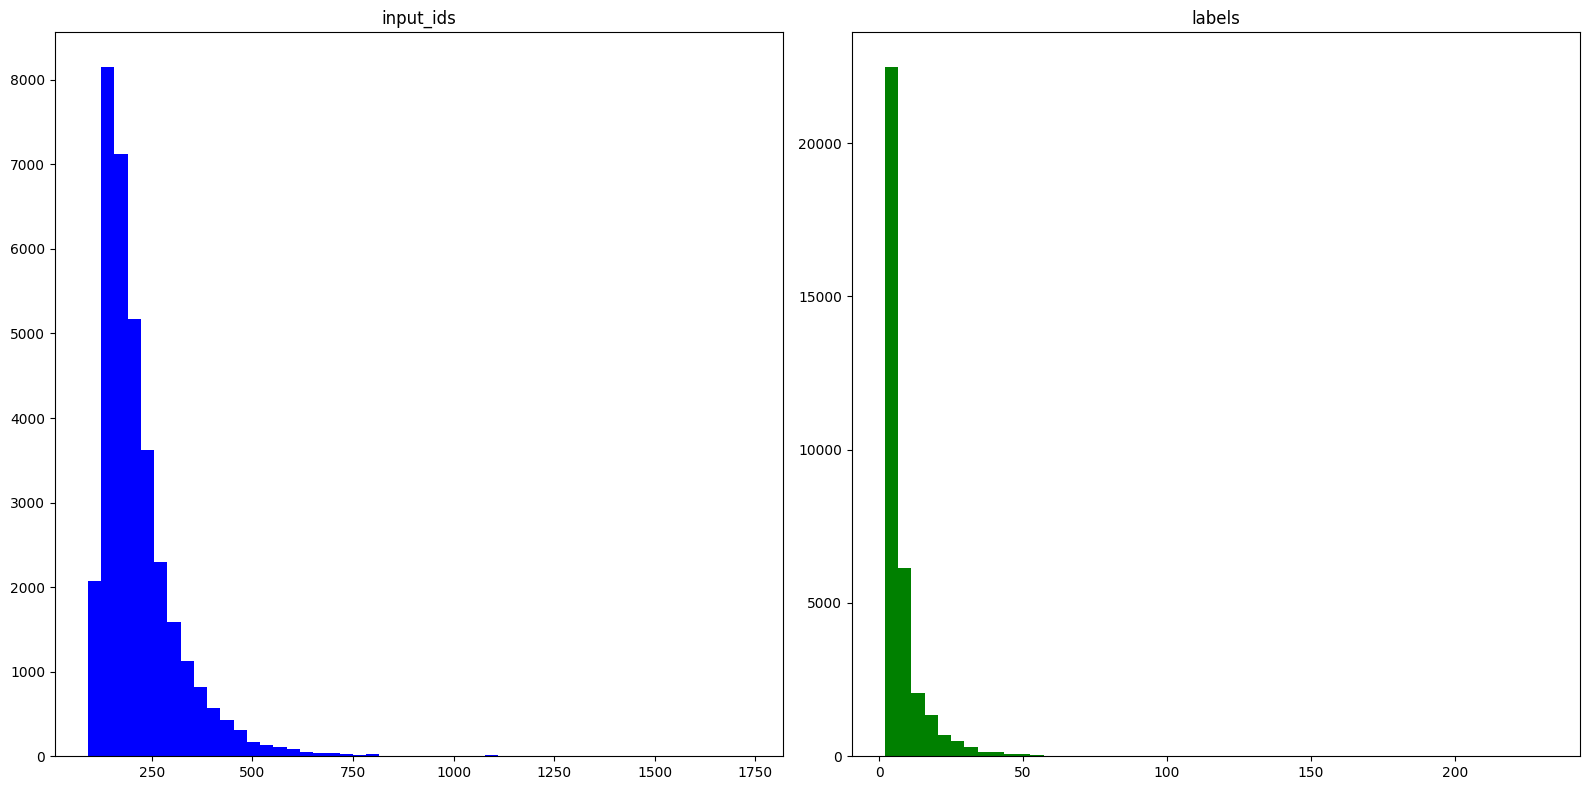

In [61]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.hist(input_ids, bins=50, color = "blue")
plt.title('input_ids')

plt.subplot(1, 2, 2)
plt.hist(labels, bins=50, color = "green")
plt.title('labels')

plt.tight_layout()
plt.show()



# TODO Komentarz

##### Komentarz
* Rozk≈Çad pokazuje ≈ºe na wiƒôszo≈õƒá pyta≈Ñ bƒôdziemy w stanie odpowiedzieƒá w kilku s≈Çowach.
* D≈Çugo≈õƒá odpowiedzi prawie zawsze bƒôdzie kt√≥tsza od pytania.
* Chocia≈º mo≈ºna zauwa≈ºyƒá, ≈ºe sƒÖ tak≈ºe pojedy≈Ñcze pytania wymagajƒÖce obszerniejsze odpowiedzi (nawet do 200 token√≥w).

Przyjmiemy za≈Ço≈ºenie, ≈ºe teksty wej≈õciowe bƒôdƒÖ mia≈Çy maksymalnie 256 token√≥w, a odpowiedzi do d≈Çugo≈õci 32 token√≥w.

W poni≈ºszym kodzie uwzglƒôdniamy r√≥wnie≈º fakt, ≈ºe przy obliczaniu funkcji straty nie interesuje nas wliczanie token√≥w wype≈Çnienia (PAD), gdy≈º ich udzia≈Ç by≈Çby bardzo du≈ºy, a nie wp≈ÇywajƒÖ one w ≈ºaden pozytywny spos√≥b na ocenƒô poprawno≈õci dzia≈Çania modelu.

Konteksty (pytanie + kontekst odpowiedzi) ograniczamy do 256 token√≥w, ze wzgƒôdu na ograniczenia pamiƒôciowe (zajƒôto≈õƒá pamiƒôci dla modelu jest proporcjonalna do kwadratu d≈Çugo≈õci tekstu). Dla kontekst√≥w nie u≈ºywamy parametru `padding`, poniewa≈º w trakcie treningu u≈ºyjemy modu≈Çu, kt√≥ry automatycznie doda padding, tak ≈ºeby wszystkie sekewncje mia≈Çy d≈Çugo≈õƒá najd≈Çu≈ºszego tekstu w ramach paczki (modu≈Ç ten to `DataCollatorForSeq2Seq`).

In [62]:
def preprocess_function(examples):
    result = plt5_tokenizer(examples["text"], truncation=True, max_length=256)
    targets = plt5_tokenizer(
        examples["labels"], truncation=True, max_length=32, padding=True
    )
    target_ids = [
        [(l if l != plt5_tokenizer.pad_token_id else -100) for l in e]
        for e in targets["input_ids"]
    ]
    result["labels"] = target_ids
    return result


tokenized_datasets = datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/34028 [00:00<?, ? examples/s]

Map:   0%|          | 0/5563 [00:00<?, ? examples/s]

Nastƒôpnie weryfkiujemy, czy przetworzone teksty majƒÖ poprawnƒÖ postaƒá.

In [63]:
print(tokenized_datasets["train"][0].keys())
print(tokenized_datasets["train"][0]["input_ids"])
print(tokenized_datasets["train"][0]["labels"])
print(len(tokenized_datasets["train"][0]["input_ids"]))
print(len(tokenized_datasets["train"][0]["labels"]))

dict_keys(['text', 'labels', 'input_ids', 'attention_mask'])
[21584, 291, 639, 402, 11586, 292, 23822, 267, 1269, 8741, 280, 24310, 42404, 305, 373, 1525, 15643, 291, 2958, 273, 19605, 6869, 271, 298, 2256, 7465, 394, 540, 2142, 259, 17542, 13760, 10331, 9511, 322, 31220, 261, 358, 348, 267, 7243, 430, 470, 271, 39908, 20622, 2178, 18204, 308, 8439, 2451, 259, 1974, 455, 540, 2142, 1283, 272, 994, 525, 259, 15697, 1978, 267, 264, 644, 259, 14988, 19434, 265, 1109, 287, 274, 357, 259, 21308, 264, 525, 259, 35197, 305, 265, 793, 823, 259, 25318, 2750, 4724, 31015, 21207, 4162, 40335, 18058, 259, 274, 4862, 7030, 261, 5269, 259, 658, 497, 261, 6971, 1890, 35042, 267, 266, 3260, 644, 259, 14988, 19434, 1187, 20919, 284, 27584, 19605, 1230, 2555, 259, 12531, 7278, 3845, 8726, 10486, 1187, 10676, 261, 996, 347, 260, 2548, 2142, 525, 259, 15697, 1978, 309, 27648, 31887, 19605, 259, 274, 4931, 36525, 37011, 4162, 10036, 7141, 265, 6340, 266, 465, 346, 269, 3648, 4383, 6704, 294, 465, 567, 2142

## ≈Åadowanie modelu

Dla problemu odpowiadania na pytania potrzebowaƒá bƒôdziemy innego pre-trenowanego modelu oraz innego przygotowania danych. Jako model bazowy wykrzystamy polski wariant modelu T5 - [plT5](https://huggingface.co/allegro/plt5-base). Model ten trenowany by≈Ç w zadaniu *span corruption*, czyli zadani polegajƒÖcym na usuniƒôciu fragmentu tekstu. Model na wej≈õciu otrzymywa≈Ç tekst z pominiƒôtymi pewnymi fragmentami, a na wyj≈õciu mia≈Ç odtwarzaƒá te fragmenty. Oryginalny model T5 dodatkowo pretrenowany by≈Ç na kilku konkretnych zadaniach z zakresu NLP (w tym odpowiadaniu na pytania). W wariancie plT5 nie przeprowadzono jednak takiego dodatkowego procesu.

Poni≈ºej ≈Çadujemy model dla zadania, w kt√≥rym model generuje tekst na podstawie innego tekstu (tzn. jest to zadanie zamiany tekstu na tekst, po angielsku zwanego te≈º *Sequence-to-Sequence*).

In [64]:
from transformers import AutoModelForSeq2SeqLM

model_seq = AutoModelForSeq2SeqLM.from_pretrained("allegro/plt5-base")

pytorch_model.bin:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

W celu poprawy szybko≈õci treningu  mogliby≈õmy u≈ºyƒá podobnej metody jak przy klasyfikacji. IstniejƒÖ jednak bardziej efektywne metody, np. low-rank adaptation (LoRA), kt√≥re dokomponujƒÖ macierze wag na dwie macietze o mniejszej liczbie parameyr√≥w. SƒÖ one szczeg√≥lnie istotne dla uczenia du≈ºych modeli. Dziƒôki bibliotece PEFT ich u≈ºycie jest bardzo proste. Skorzystamy zatem z LoRA przy tworzeniu modelu QA.

W pierwszej kolejno≈õci konfigurujemy metodƒô:

In [65]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32, # Rank
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM # FLAN-T5
)

Teraz opakowujemy oryginalny model w model PEFT. Oryginalny model nie bƒôdzie modyfikowany. Musimy jednak pamietaƒá ≈ºeby wszƒôdzie u≈ºywaƒá modelu PEFT.

In [66]:
peft_model = get_peft_model(model_seq, lora_config)
print_trainable_parameters(peft_model)

trainable params: 3,538,944 || all params: 278,641,920 || trainable%: 1.2701%


1.2700687678293345

Widzimy, ≈ºe liczba modyfikowalnych parametr√≥w jest bardzo ma≈Ça wzglƒôdem oryginalnego modelu.

## Trening modelu QA

Ostatnim krokiem przed uruchomieniem treningu jest zdefiniowanie metryk, wskazujacych jak model radzi sobie z problemem. Wykorzystamy dwie metryki:
* *exact match* - kt√≥ra sprawdza dok≈Çadne dopasowanie odpowiedzi do warto≈õci referencyjnej, metryka ta jest bardzo restrykcyjna, poniewa≈º pojedynczy znak bƒôdzie powodowa≈Ç, ≈ºe warto≈õƒá bƒôdzie niepoprawna,
* *blue score* - metryka uwzglƒôdniajƒÖca czƒô≈õciowe dopasowanie pomiƒôdzy odpowiedziƒÖ a warto≈õciƒÖ referencyjnƒÖ, najczƒô≈õciej u≈ºywana jest do oceny maszynowego t≈Çumaczenia tekstu, ale mo≈ºe byƒá r√≥wnie≈º przydatna w ocenie wszelkich zada≈Ñ, w kt√≥rych generowany jest tekst.

Wykorzystujemy bibilotekƒô `evaluate`, kt√≥ra zawiera definicje obu metryk.

Przy konwersji identyfikator√≥w token√≥w na tekstu zamieniamy r√≥wnie≈º z powroten tokeny o warto≈õci -100 na identyfikatory paddingu. W przeciwnym razie dostaniemy b≈ÇƒÖd o nieistniejƒÖcym identyfikatorze tokenu.

W procesie treningu pokazujemy r√≥wnie≈º r√≥≈ºnicƒô miƒôdzy jednƒÖ wygenerowanƒÖ oraz prawdziwƒÖ odpowiedziƒÖ dla zbioru ewaluacyjnego. W ten spos√≥b mo≈ºemy ≈õledziƒá co rzeczywi≈õcie dzieje siƒô w modelu.

In [67]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
import numpy as np
import evaluate

exact = evaluate.load("exact_match")
bleu = evaluate.load("bleu")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.where(predictions != -100, predictions, plt5_tokenizer.pad_token_id)
    decoded_preds = plt5_tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, plt5_tokenizer.pad_token_id)
    decoded_labels = plt5_tokenizer.batch_decode(labels, skip_special_tokens=True)
    print("prediction: " + decoded_preds[0])
    print("reference : " + decoded_labels[0])

    result = exact.compute(predictions=decoded_preds, references=decoded_labels)
    result = {**result, **bleu.compute(predictions=decoded_preds, references=decoded_labels)}
    del result["precisions"]

    prediction_lens = [np.count_nonzero(pred != plt5_tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return result

## Zadanie 7 (0.5 punkty)



KorzystajƒÖc z klasy Seq2SeqTrainingArguments zdefiniuj nastƒôpujƒÖce parametry trenignu:
* inny katalog z wynikami
* liczba epok: 2
* wielko≈õƒá paczki: 24 (je≈õli Twoja karta ma 16GB VRAM)
* ewaluacja co 200 krok√≥w,
* szybko≈õƒá uczenia: 1e-3
* optymalizator: adafactor
* maksymalna d≈Çugo≈õƒá generowanej odpowiedzi: 32,
* akumulacja wynik√≥w ewaluacji: 4
* generowanie wynik√≥w podczas ewaluacji

**W treningu nie u≈ºywamy optymalizacji FP16!** Jej u≈ºycie spowoduje, ≈ºe model nie bƒôdzie siƒô trenowa≈Ç. Je≈õli chcesz u≈ºyƒá optymalizacji, to mo≈ºesz skorzystaƒá z **BF16**.

Argumenty powinny r√≥wnie≈º wskazywaƒá, ≈ºe przeprowadzoany jest proces uczenia i ewaluacji.

In [68]:
arguments_seq = Seq2SeqTrainingArguments(
    output_dir=path + "/output_qa ",
    num_train_epochs=2,
    per_device_train_batch_size=24,
    per_device_eval_batch_size=24,
    eval_steps=200,
    learning_rate=1e-3,
    optim="adafactor",
    generation_max_length=32,
    eval_accumulation_steps = 4,
    eval_strategy ="steps",
    predict_with_generate=True,
    do_train = True,
    do_eval = True,
    fp16=False,
    report_to = "tensorboard",
)


## Zadanie 8 (0.5 punktu)

Utw√≥rz obiekt trenujƒÖcy `Seq2SeqTrainer`, za pomocƒÖ kt√≥rego bƒôdzie trenowany model odpowiadajƒÖcy na pytania.

Obiekt ten powinien:
* wykorzystywaƒá model `plt5-base`,
* wykorzystywaƒá zbi√≥r `train` do treningu,
* wykorzystawaƒá zbi√≥r `dev` do evaluacji,
* wykorzystaƒá klasƒô batchujƒÖcƒÖ (`data_collator`) o nazwie `DataCollatorWithPadding`.

In [69]:
from transformers import DataCollatorForSeq2Seq, DataCollatorWithPadding

trainer = Seq2SeqTrainer(
    model=model_seq,
    args=arguments_seq,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["dev"],
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(plt5_tokenizer)
)


In [70]:
# %reload_ext tensorboard
# %tensorboard --logdir gdrive/MyDrive/poquad/output_qa/runs # gdrive/MyDrive/poquad/output_qa/runs

MajƒÖc przygotowane wszystkie dane wej≈õciowe mo≈ºemy rozpoczƒÖƒá proces treningu.

**Uwaga**: proces treningu na Google Colab z wykorzystaniem akceleratora zajmuje ok. 1 godziny. Uruchomienie treningu na CPU mo≈ºe trwaƒá ponad 1 dzie≈Ñ!

Mo≈ºesz pominƒÖƒá ten proces i w kolejnych krokach wykorzystaƒá gotowy model `apohllo/plt5-base-poquad`, kt√≥ry znajduje siƒô w repozytorium Hugginface.

In [71]:
# Wykorzystam ju≈º stworzony model.

In [ ]:
#14m @ 4080
trainer.train()

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

prediction: nie
reference : kompilacjƒÖ poglƒÖd√≥w r√≥≈ºnych rabin√≥w na okre≈õlony temat


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

prediction: tak
reference : kompilacjƒÖ poglƒÖd√≥w r√≥≈ºnych rabin√≥w na okre≈õlony temat


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

prediction: Miszna
reference : kompilacjƒÖ poglƒÖd√≥w r√≥≈ºnych rabin√≥w na okre≈õlony temat


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

KeyboardInterrupt: 

## Zadanie 9 (1.5 punkt)

KorzystajƒÖc z wywo≈Çania `generate` w modelu, wygeneruj odpowiedzi dla 1 kontekstu i 10 pyta≈Ñ dotyczƒÖcych tego kontekstu. Pamiƒôtaj aby zamieniƒá identyfikatory token√≥w na ich tre≈õƒá. Mo≈ºesz do tygo wykorzystaƒá wywo≈Çanie `decode` z tokenizera.

Je≈õli w poprzednim punkcie nie uda≈Ço Ci siƒô wytrenowaƒá modelu, mo≈ºesz skorzystaƒá z modelu `apohllo/plt5-base-poquad`.

Oce≈Ñ wyniki (odpowiedzi) generowane przez model.

In [72]:
from transformers import AutoTokenizer
model_auto = AutoModelForSeq2SeqLM.from_pretrained("apohllo/plt5-base-poquad")
tokenizer_auto = AutoTokenizer.from_pretrained("apohllo/plt5-base-poquad")


config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/833 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.59M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/416 [00:00<?, ?B/s]

In [73]:
content = '''Space Exploration Technologies Corporation (SpaceX) ‚Äì ameryka≈Ñskie przedsiƒôbiorstwo przemys≈Çu kosmicznego, za≈Ço≈ºone w roku 2002 przez Elona Muska. Jego celem jest budowa silnik√≥w rakietowych i rakiet no≈õnych oraz statk√≥w kosmicznych, w tym tak≈ºe za≈Çogowych. Kluczem do osiƒÖgniƒôcia sukcesu ma byƒá znaczne zmniejszenie koszt√≥w wynoszenia ≈Çadunku na orbitƒô. Przede wszystkim, SpaceX projektuje i buduje seriƒô rakiet orbitalnych Falcon i statk√≥w kosmicznych Dragon.
Siedziba, montownia rakiet i biuro projektowe znajdujƒÖ siƒô w Hawthorne (hrabstwo Los Angeles) w Kalifornii. Silniki i inne du≈ºe elementy testowane sƒÖ w McGregor w stanie Teksas. Ponadto firma posiada kilka biur regionalnych na terenie USA, a w styczniu 2015 r. og≈Çoszono plan utworzenia w Redmond w stanie Waszyngton biura projektowego na potrzeby planowanej produkcji satelit√≥w telekomunikacyjnych.
SpaceX zosta≈Ça za≈Ço≈ºona  6 maja 2002r. przez Elona Muska, wsp√≥≈Çtw√≥rcƒô firm Zip2 oraz PayPal i prezesa Tesla Motors. Fundusze uzyskane z poprzednich projekt√≥w Musk zainwestowa≈Ç w technikƒô kosmicznƒÖ. Zdecydowa≈Ç siƒô na budowƒô rakiet, kt√≥re znaczƒÖco zmniejszƒÖ koszty wynoszenia ≈Çadunk√≥w w przestrze≈Ñ kosmicznƒÖ. Cel ma zostaƒá osiƒÖgniƒôty przez wielokrotne u≈ºycie stopni rakiety po ich odzyskaniu (zautomatyzowane lƒÖdowanie na lƒÖdzie lub statku) oraz przez u≈ºycie sprawdzonych i tanich technologii oraz seryjnej produkcji.
W listopadzie 2005 r. SpaceX zatrudnia≈Ço 160 os√≥b. W 2010 r. by≈Ço to ju≈º 1180 pracownik√≥w, w maju 2012 r. 1800, w 2013 roku prawie 3000 os√≥b. W 2015 roku liczba zatrudnionych osiƒÖgnƒô≈Ça 5000.
SpaceX zaprojektowa≈Ç seriƒô rakiet, z kt√≥rych nie wszystkie zosta≈Çy ostatecznie zbudowane. Pracuje tak≈ºe nad przysz≈Çymi, wiƒôkszymi rakietami z rodziny Falcon. Wszystkie te rakiety oparte sƒÖ na silnikach rodziny Merlin 1 (jedynie Falcon 1 u≈ºywa≈Ça w drugim cz≈Çonie mniejszego silnika Kestrel), kt√≥rych kolejne wersje znajdujƒÖ wykorzystanie w nowszych modelach rakiet.
'''

questions = [
    "Kiedy zosta≈Ç za≈Ço≈ºony SpaceX?",
    "Kto jest za≈Ço≈ºycielem SpaceX?",
    "Gdzie znajduje siƒô siedziba SpaceX?",
    "Ile wynosi≈Ça liczba zatrudnionych w 2015 roku? ",
    "Gdzie sƒÖ testowane silniki SpaceX?",
    "SkƒÖd Musk mia≈Ç fundusze na SpaceX",
    "Na jakich silnikach sƒÖ oparte rakiety z rodziny Falcon?",
    "Jak inaczej jest nazywany SpaceX?",
    "Jakiej narodowo≈õci jest firma SpaceX?",
    "Czego wsp√≥≈Çtw√≥rcƒÖ jest Elon Musk?"
]

answers = [
    "6 maja 2002r.",
    "Elon Musk.",
    "Hawthorne.",
    "5000.",
    "W McGregor w stanie Teksas.",
    "Z poprzednich projekt√≥w.",
    "Rodziny Merlin 1.",
    "Space Exploration Technologies Corporation.",
    "Ameryka≈Ñskiego.",
    "Zip2 oraz PayPal."
]

strings = [f"Pytanie: {q} Kontekst: {content}" for q in questions]

inputs = tokenizer_auto(strings, return_tensors="pt", padding=True)

outputs = model_auto.generate(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"]
)
decoded = tokenizer_auto.batch_decode(outputs, skip_special_tokens=True)

print(f"Kontekst:\n {content}\n\n")

for i, q in enumerate(questions):
  print(f"Pytanie {i+1}: {q}")
  print(f"Odpowied≈∫: {decoded[i]}")
  print(f"Oczekiwana odpowiedz: {answers[i]}\n")


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Kontekst:
 Space Exploration Technologies Corporation (SpaceX) ‚Äì ameryka≈Ñskie przedsiƒôbiorstwo przemys≈Çu kosmicznego, za≈Ço≈ºone w roku 2002 przez Elona Muska. Jego celem jest budowa silnik√≥w rakietowych i rakiet no≈õnych oraz statk√≥w kosmicznych, w tym tak≈ºe za≈Çogowych. Kluczem do osiƒÖgniƒôcia sukcesu ma byƒá znaczne zmniejszenie koszt√≥w wynoszenia ≈Çadunku na orbitƒô. Przede wszystkim, SpaceX projektuje i buduje seriƒô rakiet orbitalnych Falcon i statk√≥w kosmicznych Dragon.
Siedziba, montownia rakiet i biuro projektowe znajdujƒÖ siƒô w Hawthorne (hrabstwo Los Angeles) w Kalifornii. Silniki i inne du≈ºe elementy testowane sƒÖ w McGregor w stanie Teksas. Ponadto firma posiada kilka biur regionalnych na terenie USA, a w styczniu 2015 r. og≈Çoszono plan utworzenia w Redmond w stanie Waszyngton biura projektowego na potrzeby planowanej produkcji satelit√≥w telekomunikacyjnych.
SpaceX zosta≈Ça za≈Ço≈ºona  6 maja 2002r. przez Elona Muska, wsp√≥≈Çtw√≥rcƒô firm Zip2 oraz PayPal i 

##### Komentarz
Model bardzo dobrze sobie poradzi≈Ç z odpowiedziami na pytania. M√≥g≈Çby byƒá mo≈ºe bardziej szczeg√≥≈Çowy np. w pytaniu 5, ale og√≥lnie nie widaƒá ≈ºadnych zastrze≈ºe≈Ñ.

# Zadanie dodatkowe (3 punkty)

Stworzenie pe≈Çnego rozwiƒÖzania w zakresie odpowiadania na pytania wymaga r√≥wnie≈º znajdowania kontekst√≥w, w kt√≥rych mo≈ºe pojawiƒá siƒô pytanie.

Obenie istnieje coraz wiƒôcej modeli neuronalnych, kt√≥re bardzo dobrze radzƒÖ sobie ze znajdowaniem odpowiednich tekst√≥w. R√≥wnie≈º dla jƒôzyka polskiego nastƒôpuje tutaj istotny postƒôp. Powsta≈Ça m.in. [strona ≈õledzƒÖca postƒôpy w tym zakresie](https://huggingface.co/spaces/sdadas/pirb).

KorzystajƒÖc z informacji na tej stronie wybierz jeden z modeli do wyszukiwania kontekst√≥w (najlepiej o rozmiarze `base` lub `small`). Zamie≈Ñ konteksty wystƒôpujƒÖce w zbiorze PoQuAD na reprezentacje wektorowe. To samo zr√≥b z pytaniami wystƒôpujƒÖcymi w tym zbiorze. Dla ka≈ºdego pytania znajd≈∫ kontekst, kt√≥ry wed≈Çug modelu najlepiej odpowiada na zadane pytanie. Do znalezienia kontekstu oblicz iloczyn skalarny pomiƒôdzy reprezentacjƒÖ pytania oraz wszystkimi kontekstami ze zbioru. Nastƒôpnie uruchom model generujƒÖcy odpowied≈∫ na znalezionym kontek≈õcie. Por√≥wnaj wyniki uzyskiwane w ten spos√≥b, z wynikami, gdy poprawny kontekst jest znany.

W celu przyspieszenie oblicze≈Ñ mo≈ºesz zmniejszyƒá liczbƒô pyta≈Ñ i odpowiadajƒÖcych im kontekst√≥w. Pamiƒôtaj jednak, ≈ºeby liczba kontekst√≥w by≈Ça odpowiednio du≈ºa (sugerowana warto≈õƒá min. to 1000 kontekst√≥w), tak ≈ºeby znalezienie kontekstu nie by≈Ço trywialne.

Zastan√≥w siƒô jakiej metryki u≈ºyjesz do oceny znalezionych odpowiedzi. Przedstaw wyniki oceny odpowiedzi pe≈Çnego rozwiƒÖzania wed≈Çug wybranej metryki.